# Problem Statement

## Introduction:

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.


Dataset:
'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?
1642751181'

## About Delhivery:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Why this case study?
From Delhivery’s Perspective:

● Delhivery aims to establish itself as the premier player in the logistics industry. This
case study is of paramount importance as it aligns with the company's core objectives
and operational excellence.
● It provides a practical framework for understanding and processing data, which is
integral to their operations. By leveraging data engineering pipelines and data analysis
techniques, Delhivery can achieve several critical goals.
● First, it allows them to ensure data integrity and quality by addressing missing values
and structuring the dataset appropriately.
● Second, it enables the extraction of valuable features from raw data, which can be
utilized for building accurate forecasting models.
● Moreover, it facilitates the identification of patterns, insights, and actionable
recommendations crucial for optimizing their logistics operations.
● By conducting hypothesis testing and outlier detection, Delhivery can refine their
processes and further enhance the quality of service they provide.



From Learners' Perspective:

● Learners will gain hands-on experience in data preprocessing and cleaning, which is
often the most time-consuming aspect of data analysis.
● Feature engineering is a critical step in building machine learning models. In this case
study, learners will understand how to extract meaningful features from raw data,
including datetime manipulation and column splitting.
● The case study introduces learners to the concept of grouping data based on specific
keys and then aggregating it. This is a key aspect of data analysis, especially when
dealing with time-series data or data with a hierarchical structure.
● Learners will perform hypothesis testing, to validate assumptions and draw insights
from data.
● The case study goes beyond data analysis by focusing on deriving actionable insights
for a business. Learners will understand how data analysis can drive informed
decision-making and recommendations.

In [487]:
'''
Problem Statement:

Delhivery wants to understand and process the data coming out of the data engineering pipelines.
The two main tasks involved here are:

1. Cleaning pre-processing and manipulating the data to extract useful features from the raw data.
2. Making sense out of the raw data to provide business insights and recommendations and to help the data science team to build the forecasting models on it.
'''

'\nProblem Statement:\n\nDelhivery wants to understand and process the data coming out of the data engineering pipelines.\nThe two main tasks involved here are:\n\n1. Cleaning pre-processing and manipulating the data to extract useful features from the raw data.\n2. Making sense out of the raw data to provide business insights and recommendations and to help the data science team to build the forecasting models on it.\n'

#Initial Analysis

In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)


In [489]:
data = pd.read_csv('delhivery_data.csv')

In [490]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [491]:
data.shape

(144867, 24)

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [337]:
data.duplicated().sum()

0

In [338]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [339]:
'''

1. There are 144866 rows and 24 columns before dropping null values.
2. Time and distance related columns are the main ones and they are numerical. All of them have quite a big range i.e. max - min so that means that they contain a lot of outliers.
3. Route type is a categorical column with possible values being Carting and FTL.
4. There are no duplicated rows.
5. Min actual time is 9 mins.

'''

'\n\n1. There are 144866 rows and 24 columns before dropping null values.\n2. Time and distance related columns are the main ones and they are numerical. All of them have quite a big range i.e. max - min so that means that they contain a lot of outliers.\n3. Route type is a categorical column with possible values being Carting and FTL.\n4. There are no duplicated rows.\n5. Min actual time is 9 mins.\n\n'

#Basic data cleaning and exploration

##Handling missing values

In [340]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [341]:
data.isna().sum() * 100/len(data)

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [342]:
data[(data['source_name'].isna()) & (data['destination_name'].isna())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
68006,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,True,22,2018-09-27 05:01:28,25.178605,26.0,23.0,25.7246,1.130435,26.0,23.0,25.7246,1.130435
68007,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,True,44,2018-09-27 03:33:17,45.101167,114.0,44.0,54.6110,2.590909,88.0,21.0,28.8863,4.190476
68008,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,False,50,2018-09-27 03:19:19.935198,50.844665,128.0,49.0,60.9205,2.612245,13.0,4.0,6.3096,3.250000


In [343]:
(data.isna().sum().sum() - 3)*100/len(data)

0.380348871723719

In [344]:
'''
There are missing values present in the columns:
source_name has 293 missing values
destination_name has 261 missing values

So total 293 + 261 - 3 = 551 rows (we subtracted 3 as for those rows both the columns have missing values)
551 rows comprise of just 0.38% of the total dataset rows.

So, we will remove these 551 rows.
'''

'\nThere are missing values present in the columns:\nsource_name has 293 missing values\ndestination_name has 261 missing values\n\nSo total 293 + 261 - 3 = 551 rows (we subtracted 3 as for those rows both the columns have missing values) \n551 rows comprise of just 0.38% of the total dataset rows.\n\nSo, we will remove these 551 rows.\n'

In [345]:
data.dropna(inplace = True)

In [346]:
data.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

##Analyze the structure of the data

In [347]:
data.shape

(144316, 24)

In [348]:
'''
There are 144316 rows and 24 columns.
We can see the detailed description of the data using the information given below:
'''

'\nThere are 144316 rows and 24 columns. \nWe can see the detailed description of the data using the information given below:\n'

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

### Column Profiling:

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type

  1. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

  2. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in Kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
24. segment_factor – Unknown field

In [350]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144316,2,training,104632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144316,14787,2018-10-01 05:04:55.268931,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144316,2,FTL,99132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144316,14787,trip-153837029526866991,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144316,1496,IND000000ACB,23267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144316,1466,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144316,26223,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [351]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

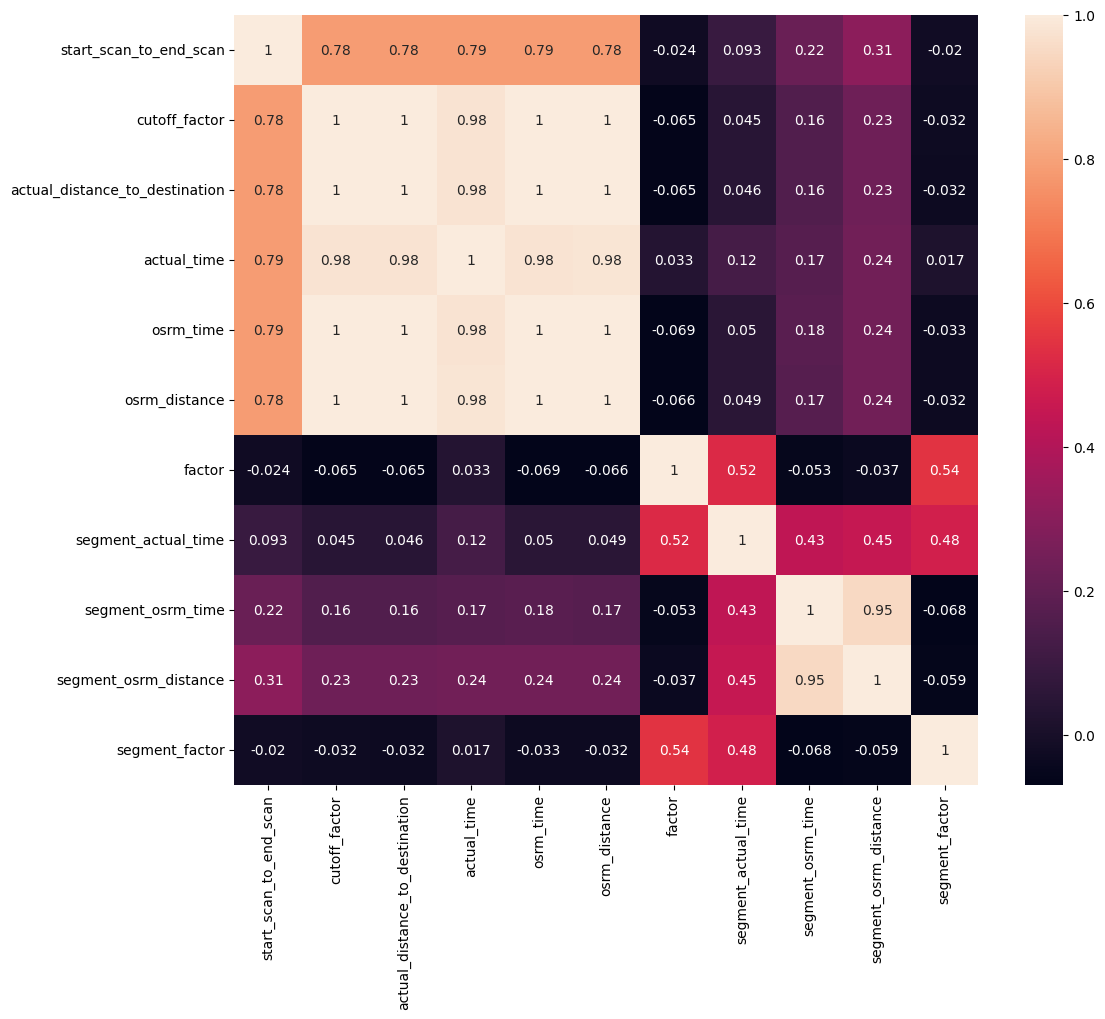

In [352]:
plt.figure(figsize = (12,10))
sns.heatmap(data[numerical_columns].corr(), annot = True)
plt.show()

In [353]:
'''
In the heatmap, we can see that
1. actual_time, osrm_time, actual_distance_to_destination and osrm_distance are all highly correlated which is expected as time and distance are directly proportional to each other.
2. segment_actual_time and segment_osrm_time are poorly correlated (not expected) even though actual_time and osrm_time are highly correlated.
3. segment_osrm_distance and segment_osrm_time are highly correlated as expected.
'''

'\nIn the heatmap, we can see that\n1. actual_time, osrm_time, actual_distance_to_destination and osrm_distance are all highly correlated which is expected as time and distance are directly proportional to each other.\n2. segment_actual_time and segment_osrm_time are poorly correlated (not expected) even though actual_time and osrm_time are highly correlated.\n3. segment_osrm_distance and segment_osrm_time are highly correlated as expected.\n'

In [354]:
data.reset_index(inplace = True)

In [355]:
'''

In this section,

We have detected the missing values and observed that the columns 'source_name' and 'destination_name'
have the missing values present but they are hardly 0.1%-0.2% of the total data.

We tried to create a mapping for center and name using the columns source_center, source_name, destination_center and destination_name
so that we can check if the source_center or destination_center where the respective name column is having missing value can be filled using this mapping.

We observed that those centers are not present anywhere else in the data with proper names hence decided to drop those rows which are having the missing values.

'''

"\n\nIn this section,\n\nWe have detected the missing values and observed that the columns 'source_name' and 'destination_name'\nhave the missing values present but they are hardly 0.1%-0.2% of the total data.\n\nWe tried to create a mapping for center and name using the columns source_center, source_name, destination_center and destination_name\nso that we can check if the source_center or destination_center where the respective name column is having missing value can be filled using this mapping.\n\nWe observed that those centers are not present anywhere else in the data with proper names hence decided to drop those rows which are having the missing values.\n\n"

##Merging of rows and aggregation of fields

In [356]:
'''
A trip may include different source and destination centers.
So, the delivery details of one package is divided into several rows (like connecting flights to reach a particular destination).
We shall combine these rows to prepare our data for analysing overall time and distances.
We will use different aggregations like cumulative sums, first/last element, sums, etc to merge the rows.

This merging will be done in 2 phases :
1. Merging rows based on a unique <‘segment_key’ made of ‘trip_uuid’, ‘source_center’, ‘destination_center’>
2. Further aggregate on the basis of only ‘trip_uuid’.
'''

'\nA trip may include different source and destination centers. \nSo, the delivery details of one package is divided into several rows (like connecting flights to reach a particular destination). \nWe shall combine these rows to prepare our data for analysing overall time and distances.\nWe will use different aggregations like cumulative sums, first/last element, sums, etc to merge the rows. \n\nThis merging will be done in 2 phases :\n1. Merging rows based on a unique <‘segment_key’ made of ‘trip_uuid’, ‘source_center’, ‘destination_center’>\n2. Further aggregate on the basis of only ‘trip_uuid’.\n'

###Segment level data

####Segment Key creation


In [357]:
data['segment_key'] = data['trip_uuid'] + '_' + data['source_center'] + '_' + data['destination_center']

In [358]:
data.head()

,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB
2,2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB
3,3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB
4,4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB


In [359]:
data['segment_key'] = data['segment_key'].str.replace('trip-', '')

In [360]:
data['segment_key'].head()

0    153741093647649320_IND388121AAA_IND388620AAB
1    153741093647649320_IND388121AAA_IND388620AAB
2    153741093647649320_IND388121AAA_IND388620AAB
3    153741093647649320_IND388121AAA_IND388620AAB
4    153741093647649320_IND388121AAA_IND388620AAB
Name: segment_key, dtype: object

####Cumulative sum columns : segment_actual_time, segment_osrm_time, segment_osrm_distance

In [361]:
segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for col in segment_cols:
  data[col + '_sum'] = data.groupby('segment_key')[col].cumsum()

data[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144311,92.0,94.0,65.3487
144312,118.0,115.0,82.7212
144313,138.0,149.0,103.4265
144314,155.0,176.0,122.3150


In [362]:
'''
So, above, we have aggregated the time and distances of each segment using cumulative sum.

So, <segment_actual_time_sum, segment_osrm_time_sum and segment_osrm_distance_sum>
should ideally be equal to <actual_time, osrm_time and osrm_distance>
,but that is not the case actually.

'''

'\nSo, above, we have aggregated the time and distances of each segment using cumulative sum.\n\nSo, <segment_actual_time_sum, segment_osrm_time_sum and segment_osrm_distance_sum>\nshould ideally be equal to <actual_time, osrm_time and osrm_distance>\n,but that is not the case actually.\n\n'

####Segment Dictionary creation

In [363]:
data.columns

Index(['index', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [364]:
create_segment_dict = {}

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
excluded_fields = ['segment_key', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']


for col in data.columns:
  if col not in create_segment_dict.keys() and col not in (unknown_fields + excluded_fields):
    create_segment_dict[col] = 'first'



col_last = ['destination_center', 'destination_name', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum']

'''
'destination_center', #we need to take last destination for the trip segment
'destination_name',  #we need to take last destination for the trip segment
'actual_distance_to_destination', #since it is already cumulative
'actual_time', #since it is already cumulative
'osrm_time', #since it is already cumulative
'osrm_distance', #since it is already cumulative
'segment_actual_time_sum', #since we calculated it using cumulative sum
'segment_osrm_time_sum', #since we calculated it using cumulative sum
'segment_osrm_distance_sum' #since we calculated it using cumulative sum
'''

for col in col_last:
  create_segment_dict[col] = 'last'

create_segment_dict

{'index': 'first',
 'data': 'first',
 'trip_creation_time': 'first',
 'route_schedule_uuid': 'first',
 'route_type': 'first',
 'trip_uuid': 'first',
 'source_center': 'first',
 'source_name': 'first',
 'destination_center': 'last',
 'destination_name': 'last',
 'od_start_time': 'first',
 'od_end_time': 'first',
 'start_scan_to_end_scan': 'first',
 'actual_distance_to_destination': 'last',
 'actual_time': 'last',
 'osrm_time': 'last',
 'osrm_distance': 'last',
 'segment_actual_time_sum': 'last',
 'segment_osrm_time_sum': 'last',
 'segment_osrm_distance_sum': 'last'}

####Group by 'Segment Key' and use dictionary for forming segment dataframe

In [365]:
segment = data.groupby(by = ['segment_key']).agg(create_segment_dict).reset_index()
segment.sort_values(by = ['segment_key', 'od_end_time'], ascending = True, inplace = True)
segment

,segment_key,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,153671041653548748_IND209304AAA_IND000000ACB,125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,153671041653548748_IND462022AAA_IND209304AAA,124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,153671042288605164_IND561203AAB_IND562101AAA,66268,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,153671042288605164_IND572101AAA_IND561203AAB,66262,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,153671043369099517_IND000000ACB_IND160002AAC,131416,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,153861115439069069_IND628204AAA_IND627657AAA,86465,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,153861115439069069_IND628613AAA_IND627005AAA,86471,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,153861115439069069_IND628801AAA_IND628204AAA,86463,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,153861118270144424_IND583119AAA_IND583101AAA,11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [366]:
segment[['segment_key', 'actual_time', 'segment_actual_time_sum', 'osrm_time', 'segment_osrm_time_sum', 'actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance_sum']]

,segment_key,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,actual_distance_to_destination,osrm_distance,segment_osrm_distance_sum
0,153671041653548748_IND209304AAA_IND000000ACB,732.0,728.0,329.0,534.0,383.759164,446.5496,670.6205
1,153671041653548748_IND462022AAA_IND209304AAA,830.0,820.0,388.0,474.0,440.973689,544.8027,649.8528
2,153671042288605164_IND561203AAB_IND562101AAA,47.0,46.0,26.0,26.0,24.644021,28.1994,28.1995
3,153671042288605164_IND572101AAA_IND561203AAB,96.0,95.0,42.0,39.0,48.542890,56.9116,55.9899
4,153671043369099517_IND000000ACB_IND160002AAC,611.0,608.0,212.0,231.0,237.439610,281.2109,317.7408
...,...,...,...,...,...,...,...,...
26217,153861115439069069_IND628204AAA_IND627657AAA,51.0,49.0,41.0,42.0,33.627182,42.5213,42.1431
26218,153861115439069069_IND628613AAA_IND627005AAA,90.0,89.0,48.0,77.0,33.673835,40.6080,78.5869
26219,153861115439069069_IND628801AAA_IND628204AAA,30.0,29.0,14.0,14.0,12.661945,16.0185,16.0184
26220,153861118270144424_IND583119AAA_IND583101AAA,233.0,233.0,42.0,42.0,40.546740,52.5303,52.5303


In [367]:
segment[segment['trip_uuid'] == 'trip-153741093647649320'][['trip_uuid','segment_key', 'actual_time', 'segment_actual_time_sum', 'osrm_time', 'segment_osrm_time_sum', 'actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance_sum']]


,trip_uuid,segment_key,actual_time,segment_actual_time_sum,osrm_time,segment_osrm_time_sum,actual_distance_to_destination,osrm_distance,segment_osrm_distance_sum
10370,trip-153741093647649320,153741093647649320_IND388121AAA_IND388620AAB,68.0,67.0,44.0,44.0,39.386040,54.2181,49.4772
10371,trip-153741093647649320,153741093647649320_IND388620AAB_IND388320AAA,102.0,100.0,45.0,44.0,43.595802,53.2334,53.2334


In [368]:
'''
Now, as we see above, the above particular trip-uuid has two entries associated with it.
We will further aggregate using only trip_uuid to have just one entry for each trip_uuid.

'''

'\nNow, as we see above, the above particular trip-uuid has two entries associated with it.\nWe will further aggregate using only trip_uuid to have just one entry for each trip_uuid.\n\n'

In [369]:
segment.shape

(26222, 21)

In [370]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   segment_key                     26222 non-null  object 
 1   index                           26222 non-null  int64  
 2   data                            26222 non-null  object 
 3   trip_creation_time              26222 non-null  object 
 4   route_schedule_uuid             26222 non-null  object 
 5   route_type                      26222 non-null  object 
 6   trip_uuid                       26222 non-null  object 
 7   source_center                   26222 non-null  object 
 8   source_name                     26222 non-null  object 
 9   destination_center              26222 non-null  object 
 10  destination_name                26222 non-null  object 
 11  od_start_time                   26222 non-null  object 
 12  od_end_time                     

In [371]:
'''
So we have reduced the number of rows from 144316 to just 26222. We now have 21 columns.
'''

'\nSo we have reduced the number of rows from 144316 to just 26222. We now have 21 columns.\n'

In [372]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,segment_key,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10370,153741093647649320_IND388121AAA_IND388620AAB,0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10371,153741093647649320_IND388620AAB_IND388320AAA,5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


####Feature Creation - od_time_diff_hour


In [373]:
cols_datetime = ['trip_creation_time', 'od_start_time', 'od_end_time']

segment[['trip_creation_time', 'od_start_time', 'od_end_time']]

,trip_creation_time,od_start_time,od_end_time
0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744
1,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469
2,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855
3,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591
4,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454
...,...,...,...
26217,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797
26218,2018-10-03 23:59:14.390954,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682
26219,2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194
26220,2018-10-03 23:59:42.701692,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940


In [374]:
for col in cols_datetime:
  segment[col] = pd.to_datetime(segment[col])

segment[['trip_creation_time', 'od_start_time', 'od_end_time']]

,trip_creation_time,od_start_time,od_end_time
0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744
1,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469
2,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855
3,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591
4,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454
...,...,...,...
26217,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797
26218,2018-10-03 23:59:14.390954,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682
26219,2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194
26220,2018-10-03 23:59:42.701692,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940


In [375]:
segment['od_time_diff_hour'] = ((segment['od_end_time'] - segment['od_start_time']).dt.total_seconds())/60

In [376]:
segment[segment['trip_uuid'] == 'trip-153741093647649320'][['od_start_time', 'od_end_time', 'od_time_diff_hour', 'start_scan_to_end_scan']]

,od_start_time,od_end_time,od_time_diff_hour,start_scan_to_end_scan
10370,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.213637,86.0
10371,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.173183,109.0


In [377]:
'''
In this section,

We created a dictionary 'create_trip_dict' which will have the information about which agg function should be used for each column of dataframe segment
to form a new dataframe trip which will be obtained by grouping the data from segment dataframe at trip_uuid level.

trip dataframe is trip level data.
'''

"\nIn this section,\n\nWe created a dictionary 'create_trip_dict' which will have the information about which agg function should be used for each column of dataframe segment\nto form a new dataframe trip which will be obtained by grouping the data from segment dataframe at trip_uuid level.\n\ntrip dataframe is trip level data.\n"

###Trip level data

####Trip dictionary creation

In [378]:
segment.columns

Index(['segment_key', 'index', 'data', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'od_time_diff_hour'],
      dtype='object')

In [379]:
create_trip_dict = {}

excluded_columns = ['index', 'trip_uuid', 'od_start_time', 'od_end_time', 'segment_key']

for col in segment.columns:
  if col not in create_trip_dict.keys() and col not in (excluded_columns):
    create_trip_dict[col] = 'first'

cols_last = ['destination_center', 'destination_name']
cols_sum = ['start_scan_to_end_scan', 'od_time_diff_hour', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum']

for col in cols_last:
  create_trip_dict[col] = 'last'

for col in cols_sum:
  create_trip_dict[col] = 'sum'

create_trip_dict

{'data': 'first',
 'trip_creation_time': 'first',
 'route_schedule_uuid': 'first',
 'route_type': 'first',
 'source_center': 'first',
 'source_name': 'first',
 'destination_center': 'last',
 'destination_name': 'last',
 'start_scan_to_end_scan': 'sum',
 'actual_distance_to_destination': 'sum',
 'actual_time': 'sum',
 'osrm_time': 'sum',
 'osrm_distance': 'sum',
 'segment_actual_time_sum': 'sum',
 'segment_osrm_time_sum': 'sum',
 'segment_osrm_distance_sum': 'sum',
 'od_time_diff_hour': 'sum'}

####Group By Trip_uuid to get trip level details

In [380]:
trip = segment.groupby(['trip_uuid']).agg(create_trip_dict).reset_index()
trip

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.362520
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,258.028928
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,60.590521
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,422.119867
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,348.512862


In [381]:
trip[trip['trip_uuid'] == 'trip-153741093647649320']

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
5917,trip-153741093647649320,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106,195.386819


In [382]:
trip.shape

(14787, 18)

In [383]:
'''
So, now we have only 14787 rows and 18 columns.
'''

'\nSo, now we have only 14787 rows and 18 columns.\n'

In [384]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

#Build some features to prepare the data for actual analysis

##Extracting State, City, Place and Code

In [385]:
'''
We first look at the following two features and extract relevant information from those :
Destination Name: We split and extract features out of destination. City-place-code (State)
Source Name: We split and extract features out of source. City-place-code (State)
'''

'\nWe first look at the following two features and extract relevant information from those : \nDestination Name: We split and extract features out of destination. City-place-code (State) \nSource Name: We split and extract features out of source. City-place-code (State)\n'

In [386]:
trip['source_name'] = trip['source_name'].str.lower()
trip['destination_name'] = trip['destination_name'].str.lower()

trip[['source_name','destination_name']]

,source_name,destination_name
0,kanpur_central_h_6 (uttar pradesh),kanpur_central_h_6 (uttar pradesh)
1,doddablpur_chikadpp_d (karnataka),doddablpur_chikadpp_d (karnataka)
2,gurgaon_bilaspur_hb (haryana),gurgaon_bilaspur_hb (haryana)
3,mumbai hub (maharashtra),mumbai_mirard_ip (maharashtra)
4,bellary_dc (karnataka),sandur_wrdn1dpp_d (karnataka)
...,...,...
14782,chandigarh_mehmdpur_h (punjab),chandigarh_mehmdpur_h (punjab)
14783,fbd_balabhgarh_dpc (haryana),faridabad_blbgarh_dc (haryana)
14784,kanpur_govndngr_dc (uttar pradesh),kanpur_govndngr_dc (uttar pradesh)
14785,tirunelveli_vdkkusrt_i (tamil nadu),tirchchndr_shnmgprm_d (tamil nadu)


In [387]:
def place2state(x):
  state = x.split('(')[1]
  return state[:-1]

def place2city(x):
  city = x.split('(')[0]
  city=city.split('_')[0]

  #dealing with edge cases
  if city == "pnq vadgaon shei dpc" : city = "vadgaonsheri"
  if city in ["pnq pashan dpc", "pnq rahatani dpc", "pune balaji nagar"] : city = 'pune'
  if city == "hbr layout pc" : city = "bengaluru"
  if city == "bhopal mp nagar" : city = "bhopal"
  if city == "mumbai antop hill" : city = "mumbai"
  if city == "bangalore" : city = "bengaluru"
  if city == "mumbai hub " : city = "mumbai"

  return city


def place2city_place(x):
  #removing state
  x = x.split('(')[0]
  len_ = len(x.split('_'))
  if len_ >= 3:
    return x.split('_')[1]

  #small cities have same city and place name
  if len_ == 2:
    return x.split('_')[0]

  #dealing with edge cases or improper naming conventions
  return x.split(' ')[0]


def place2code(x):
  #removing state
  x = x.split('(')[0]
  if(len(x.split('_')) >=3):
    return x.split('_')[-1]
  return 'none'


In [388]:
trip["destination_state"] = trip["destination_name"].apply(lambda x: place2state(x))
trip["destination_city"] = trip["destination_name"].apply(lambda x: place2city(x))
trip["destination_place"] = trip["destination_name"].apply(lambda x: place2city_place(x))
trip["destination_code"] = trip["destination_name"].apply(lambda x:place2code(x))

In [389]:
trip["source_state"] = trip["source_name"].apply(lambda x: place2state(x))
trip["source_city"] = trip["source_name"].apply(lambda x: place2city(x))
trip["source_place"] = trip["source_name"].apply(lambda x: place2city_place(x))
trip["source_code"] = trip["source_name"].apply(lambda x: place2code(x))

In [390]:
trip[["destination_state","destination_city","destination_place","destination_code"]]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [391]:
trip[["source_state","source_city","source_place","source_code"]]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


## Extracting trip year, month, day

In [392]:
'''
Next we extract features from trip_creation_time. These features include : Year, Month, Day,
Week, DayofWeek, Hour
'''

'\nNext we extract features from trip_creation_time. These features include : Year, Month, Day,\nWeek, DayofWeek, Hour\n'

In [393]:
trip["trip_creation_time"] = pd.to_datetime(trip["trip_creation_time"])
trip["trip_year"] = trip["trip_creation_time"].dt.year
trip["trip_month"] = trip["trip_creation_time"].dt.month
trip["trip_hour"] = trip["trip_creation_time"].dt.hour
trip["trip_day"] = trip["trip_creation_time"].dt.day
trip["trip_week"] = trip["trip_creation_time"].dt.isocalendar().week
trip["trip_dayofweek"] = trip["trip_creation_time"].dt.dayofweek

In [394]:
trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


#In-depth analysis and feature engineering

##Finding, visualizing and removing outliers (using IQR) from numeric variables

In [395]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  actual_distance_to_destination  14787 non-null  float64       
 11  ac

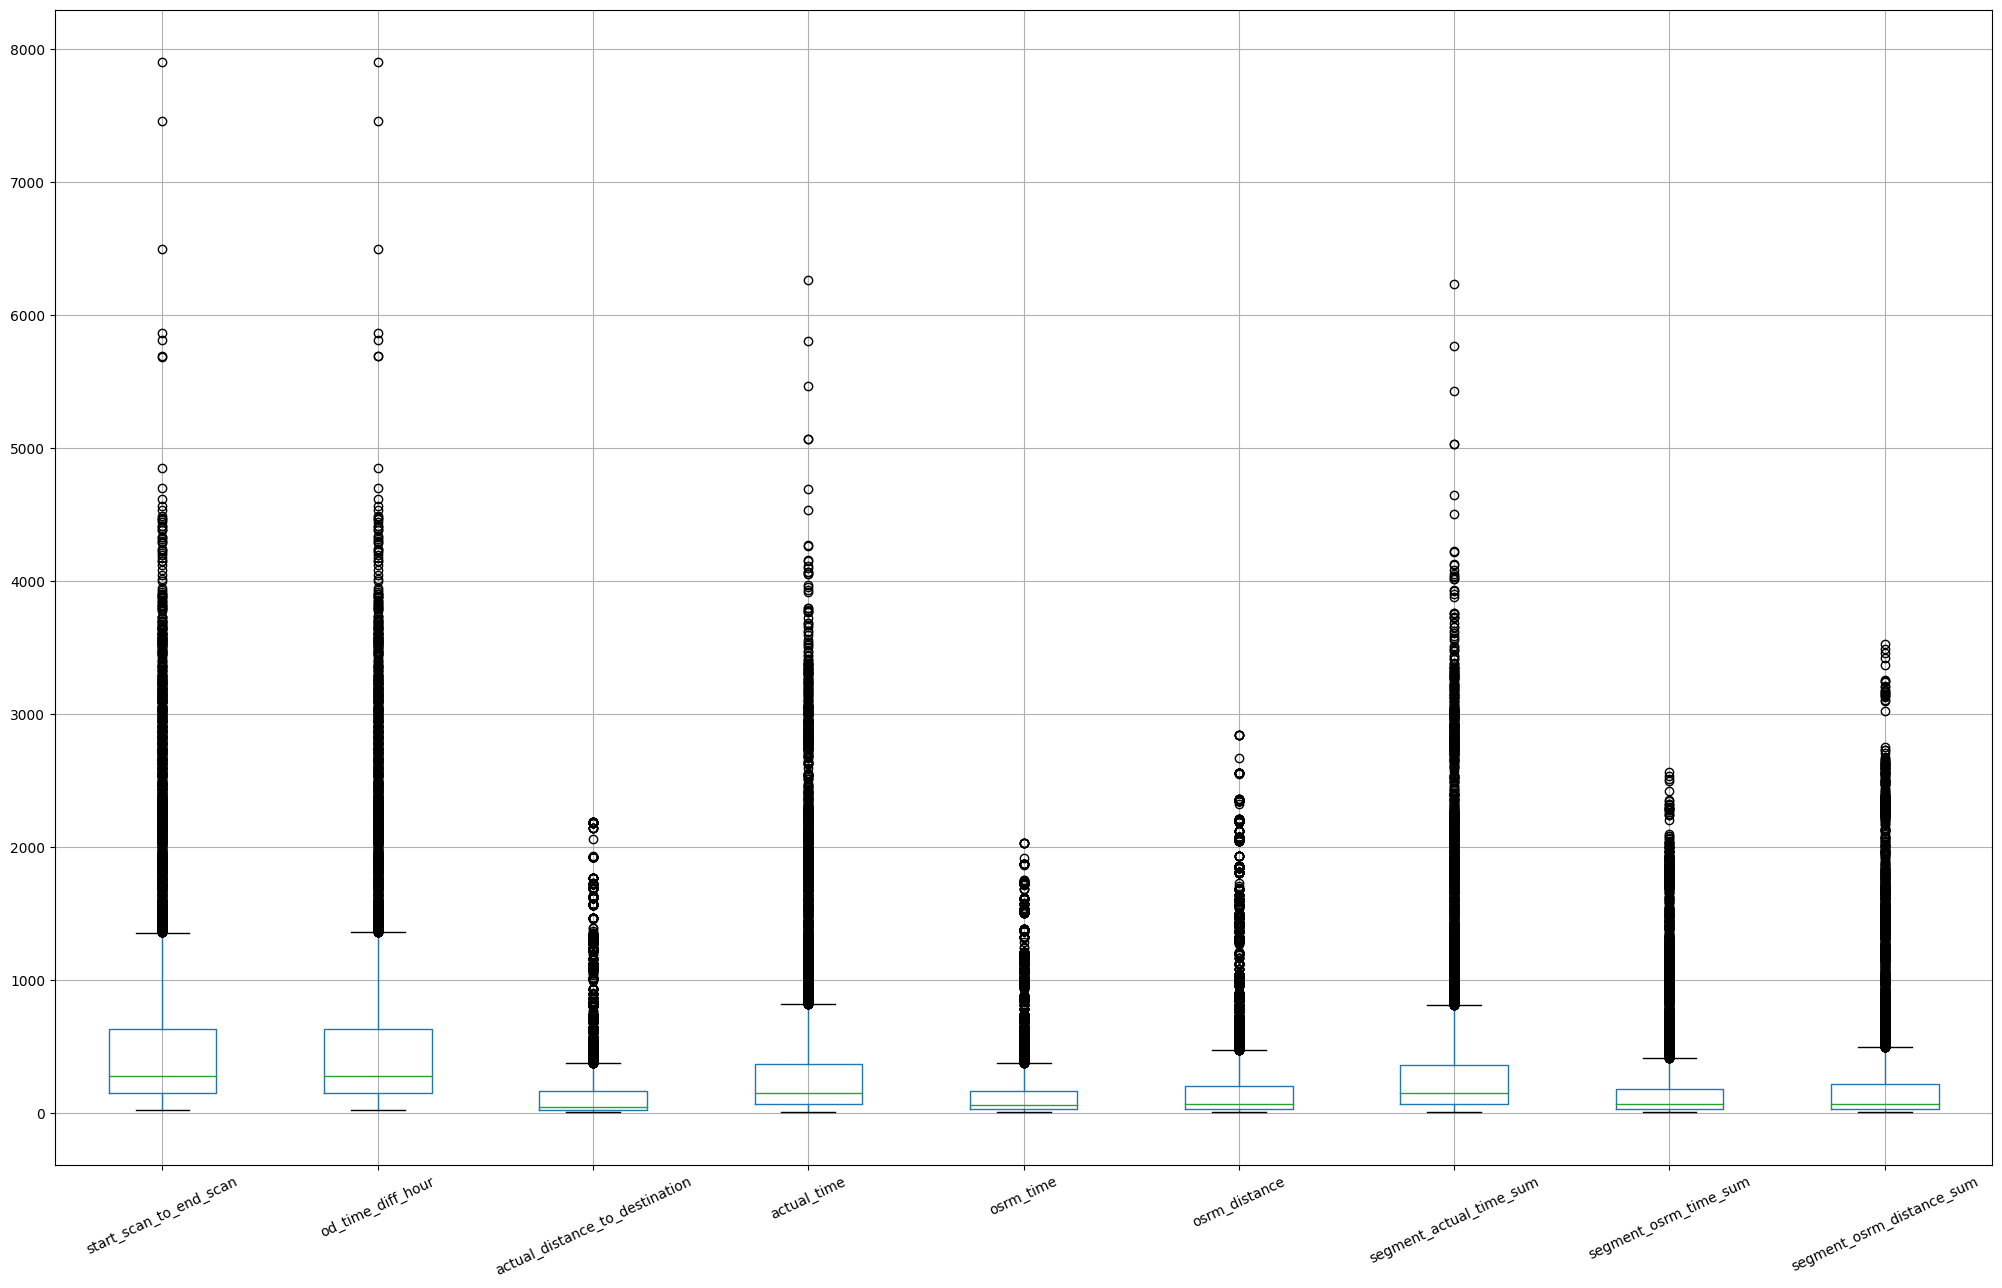

In [396]:
num_cols = ['start_scan_to_end_scan','od_time_diff_hour',
'actual_distance_to_destination','actual_time','osrm_time','osrm_distance',
'segment_actual_time_sum','segment_osrm_time_sum', 'segment_osrm_distance_sum']

trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

In [397]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3-Q1

In [398]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR))|(trip[num_cols] > (Q3 + 1.5 *IQR))).any(axis=1)]

trip = trip.reset_index(drop=True)


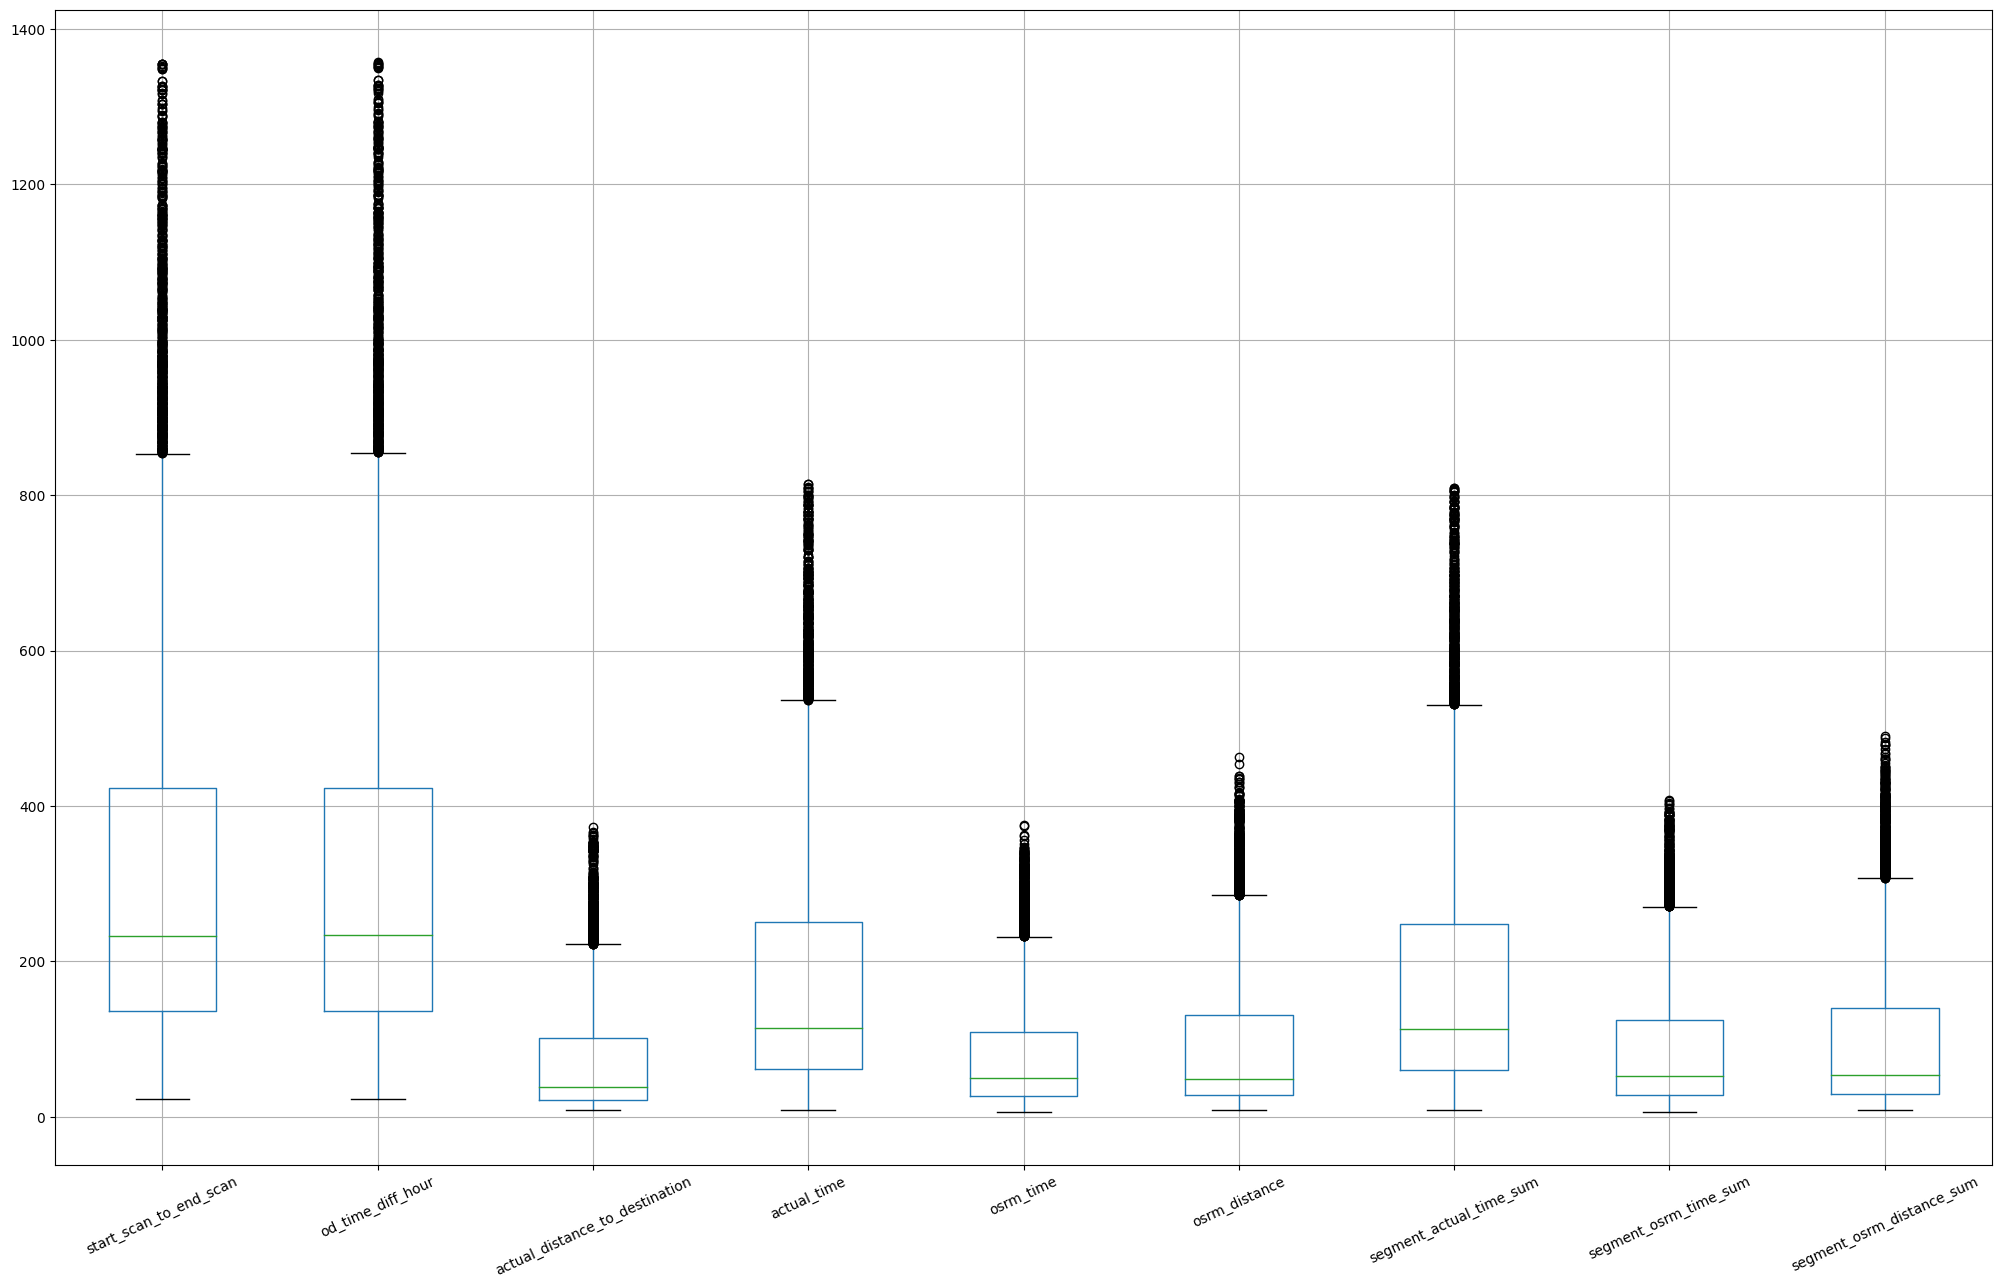

In [399]:
trip[num_cols].boxplot(rot=25, figsize=(25,15))
plt.show()

In [400]:
trip.shape

(12723, 32)

##Handling Categorical Variables

###One hot encoding

In [401]:
categorical_columns = ['route_type']

encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder.fit_transform(trip[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_columns))

trip = pd.concat([trip, one_hot_df], axis = 1)
#trip.drop(columns = ['route_type'], inplace = True)
trip

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,route_type_Carting,route_type_FTL
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2,1.0,0.0
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935,maharashtra,mumbai,mirard,ip,maharashtra,mumbai,mumbai,none,2018,9,0,12,37,2,1.0,0.0
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2,0.0,1.0
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,190.487849,tamil nadu,chennai,chennai,none,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2,1.0,0.0
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,98.005634,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,258.028928,punjab,chandigarh,mehmdpur,h,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2,1.0,0.0
12719,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,60.590521,haryana,faridabad,blbgarh,dc,haryana,fbd,balabhgarh,dpc,2018,10,23,3,40,2,1.0,0.0
12720,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,422.119867,uttar pradesh,kanpur,govndngr,dc,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2,1.0,0.0
12721,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,348.512862,tamil nadu,tirchchndr,shnmgprm,d,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2,1.0,0.0


In [402]:
'''
In this section,

We have implemented one hot encoding for the categorical column 'route_type'.
Hence two new columns have been added to the data which are 'route_type_carting' and 'route_type_FTL'.

'''

"\nIn this section,\n\nWe have implemented one hot encoding for the categorical column 'route_type'.\nHence two new columns have been added to the data which are 'route_type_carting' and 'route_type_FTL'.\n\n"

##Univariate Analysis

###Distribution of Route Types

<ipython-input-403-377137ad8aed>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["FTL","Carting"])


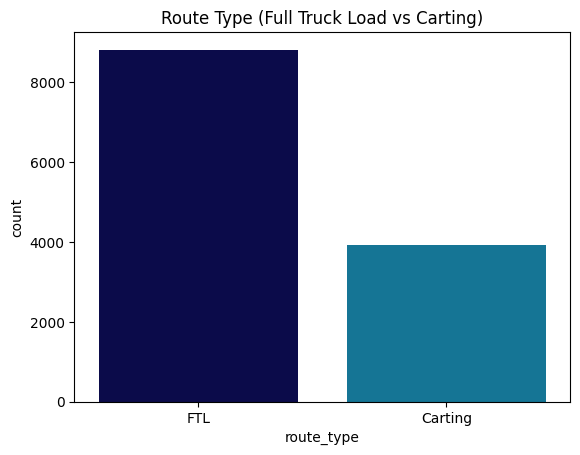

In [403]:
ax = sns.countplot(x = "route_type", data = trip, palette = 'ocean')
ax.set_xticklabels(["FTL","Carting"])
plt.title("Route Type (Full Truck Load vs Carting)")
plt.show()

In [404]:
'''
The majority of trips (8812) involved handling systems made of small vehicles (carts).
The rest of the trips (3911) involved Full Truck Load: FTL shipments get to the destination sooner,
as the truck is making no other pickups or drop-offs along the way.
'''

'\nThe majority of trips (8812) involved handling systems made of small vehicles (carts).\nThe rest of the trips (3911) involved Full Truck Load: FTL shipments get to the destination sooner,\nas the truck is making no other pickups or drop-offs along the way.\n'

###Top source and destination cities

In [405]:
source300 = pd.DataFrame(trip["source_city"].value_counts()[0:8])
destination300 = pd.DataFrame(trip["destination_city"].value_counts()[0:8])
destination300

,destination_city
bengaluru,1462
mumbai,1198
gurgaon,610
delhi,476
hyderabad,411
chennai,410
bhiwandi,377
chandigarh,313


<ipython-input-406-4d3af47b99a6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(source300.index,rotation=45)
<ipython-input-406-4d3af47b99a6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(destination300.index,rotation=45)


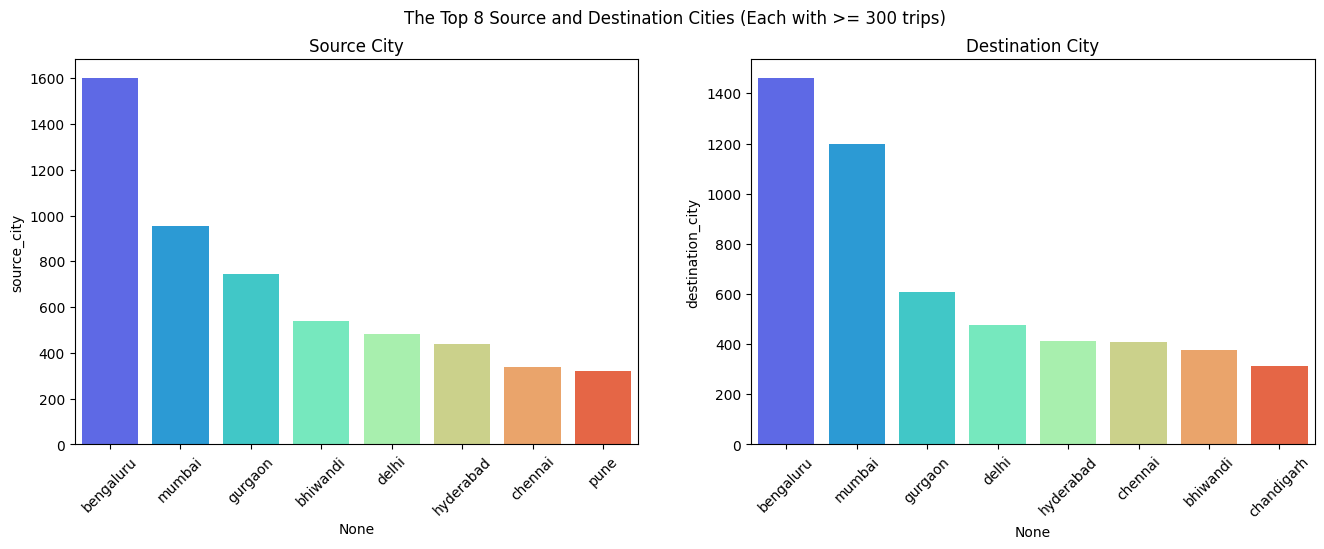

In [406]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.barplot(x = source300.index, y = source300['source_city'], data = source300, ax = ax[0], palette = 'rainbow')
ax[0].set_xticklabels(source300.index,rotation=45)
ax[0].set_title("Source City")

sns.barplot(x = destination300.index, y = destination300['destination_city'], data = destination300, ax = ax[1], palette = 'rainbow')
ax[1].set_xticklabels(destination300.index,rotation=45)
ax[1].set_title("Destination City")

plt.suptitle("The Top 8 Source and Destination Cities (Each with >= 300 trips)")
plt.show()

In [407]:
'''
So we see that Bengaluru, Mumbai and Gurgaon are both the top source and destination cities.
More trips are starting at Bhiwandi than ending there. Delhi, Hyderabad and Chennai also maintain
their relative ordering in source and destination.
'''

'\nSo we see that Bengaluru, Mumbai and Gurgaon are both the top source and destination cities.\nMore trips are starting at Bhiwandi than ending there. Delhi, Hyderabad and Chennai also maintain\ntheir relative ordering in source and destination.\n'

In [408]:
trip.groupby(['destination_city','source_city'])['actual_time'].sum().reset_index().sort_values(by='actual_time', ascending=False)

,destination_city,source_city,actual_time
186,bengaluru,bengaluru,121144.0
1053,mumbai,mumbai,50277.0
645,hyderabad,hyderabad,44130.0
1049,mumbai,bhiwandi,32402.0
565,gurgaon,delhi,30993.0
...,...,...,...
300,chabua,dibrugarh,24.0
302,chalakudy,angamaly,23.0
631,howrah,kolkata,19.0
1055,mumbai,mumbai mahim,18.0


In [409]:
trip.groupby(['destination_city','source_city'])['actual_distance_to_destination'].sum().reset_index().sort_values(by='actual_distance_to_destination',ascending=False)


,destination_city,source_city,actual_distance_to_destination
186,bengaluru,bengaluru,42937.780295
645,hyderabad,hyderabad,15461.602801
1053,mumbai,mumbai,12524.846027
409,delhi,gurgaon,11063.119871
1049,mumbai,bhiwandi,9864.383562
...,...,...,...
386,daman,vapi,9.376028
1055,mumbai,mumbai mahim,9.362187
1160,paranpur,manikchak,9.100748
1120,north delhi,delhi,9.045083


###Top source and destination states

In [410]:
sourcestate10 = pd.DataFrame(trip["source_state"].value_counts()[0:10])
destinationstate10 = pd.DataFrame(trip["destination_state"].value_counts()[0:10])
destinationstate10

,destination_state
maharashtra,2285
karnataka,2070
haryana,1333
tamil nadu,1040
telangana,682
gujarat,653
uttar pradesh,620
delhi,579
west bengal,559
punjab,549


<ipython-input-411-b88752d7a05e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(sourcestate10.index,rotation=45)
<ipython-input-411-b88752d7a05e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(destinationstate10.index,rotation=45)


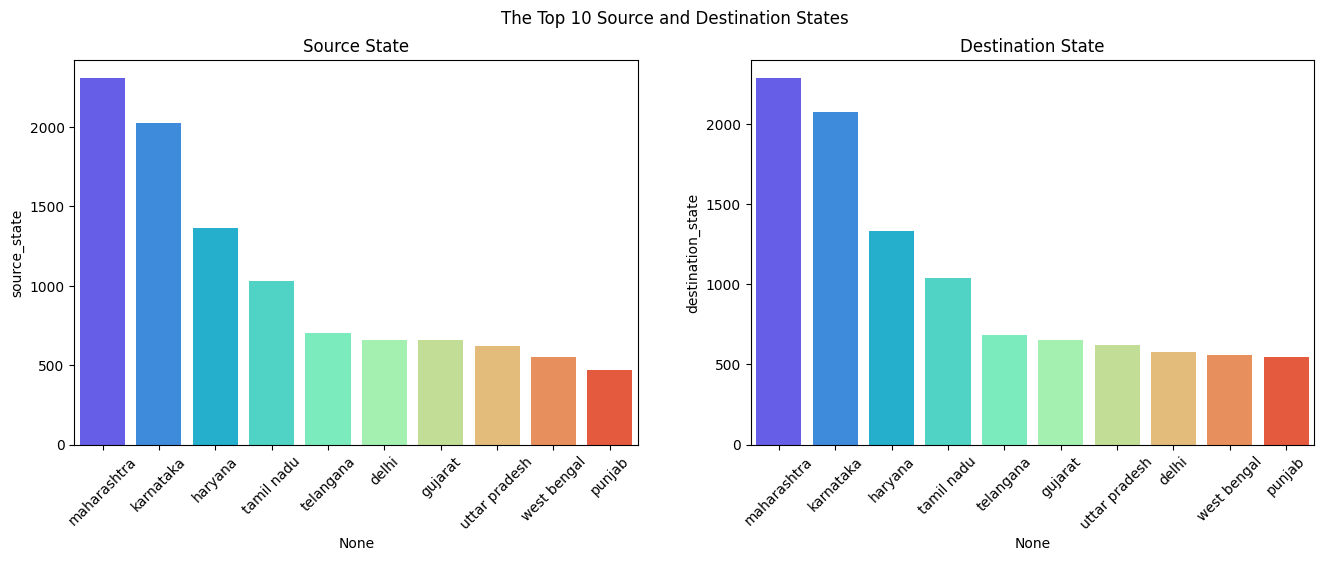

In [411]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.barplot(x = sourcestate10.index, y = sourcestate10['source_state'], data = sourcestate10, ax = ax[0], palette = 'rainbow')
ax[0].set_xticklabels(sourcestate10.index,rotation=45)
ax[0].set_title("Source State")


sns.barplot(x = destinationstate10.index, y = destinationstate10['destination_state'], data = destinationstate10, ax = ax[1], palette = 'rainbow')
ax[1].set_xticklabels(destinationstate10.index,rotation=45)
ax[1].set_title("Destination State")

plt.suptitle("The Top 10 Source and Destination States")
plt.show()


In [412]:
'''
We see that the same 10 states are the top source and destination states for the trips. Maharashtra
is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana.
'''

'\nWe see that the same 10 states are the top source and destination states for the trips. Maharashtra\nis the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana.\n'

In [413]:
trip.groupby(['source_state','destination_state'])['actual_time'].sum().reset_index().sort_values(by='actual_time', ascending=False)

,source_state,destination_state,actual_time
56,maharashtra,maharashtra,268491.0
43,karnataka,karnataka,261334.0
75,tamil nadu,tamil nadu,153442.0
79,telangana,telangana,130197.0
84,uttar pradesh,uttar pradesh,122282.0
...,...,...,...
9,assam,nagaland,306.0
74,tamil nadu,kerala,249.0
72,tamil nadu,andhra pradesh,234.0
85,uttar pradesh,uttarakhand,152.0


In [414]:
trip.groupby(['destination_state','source_state'])['actual_distance_to_destination'].sum().reset_index().sort_values(by='actual_distance_to_destination',ascending=False)


,destination_state,source_state,actual_distance_to_destination
40,karnataka,karnataka,103882.587719
56,maharashtra,maharashtra,97873.000720
77,tamil nadu,tamil nadu,70873.071768
80,telangana,telangana,56633.784572
0,andhra pradesh,andhra pradesh,50976.404367
...,...,...,...
59,mizoram,assam,128.424011
47,kerala,tamil nadu,99.858307
86,uttarakhand,uttar pradesh,70.772628
60,nagaland,assam,58.732392


###Trip Month

In [415]:
trip["trip_month"].value_counts()

9     11172
10     1551
Name: trip_month, dtype: int64

In [416]:
'''
The trips are recorded only for the months of September and October. The recording perhaps
stopped after that. So we do not analyse further on the basis of month.
'''

'\nThe trips are recorded only for the months of September and October. The recording perhaps\nstopped after that. So we do not analyse further on the basis of month.\n'

###Trip Hour Distribution

<ipython-input-417-b93cb353a2ed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["trip_hour"])


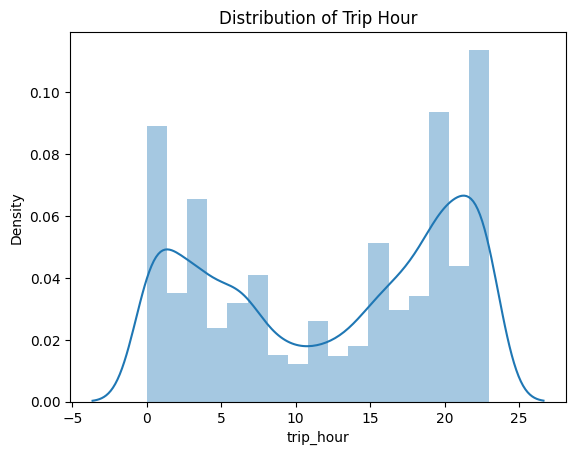

In [417]:
sns.distplot(trip["trip_hour"])
plt.title("Distribution of Trip Hour")
plt.show()

In [418]:
'''
So, we observe a kind of bimodal distribution with minimum trips occuring during the day hours
(8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).
'''

'\nSo, we observe a kind of bimodal distribution with minimum trips occuring during the day hours\n(8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).\n'

###Trip Day of Week Distribution

In [419]:
trip["trip_dayofweek"] = trip["trip_dayofweek"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
trip["trip_dayofweek"].value_counts()


Wed      2352
Sat      1836
Thurs    1819
Fri      1774
Tue      1766
Mon      1697
Sun      1479
Name: trip_dayofweek, dtype: int64

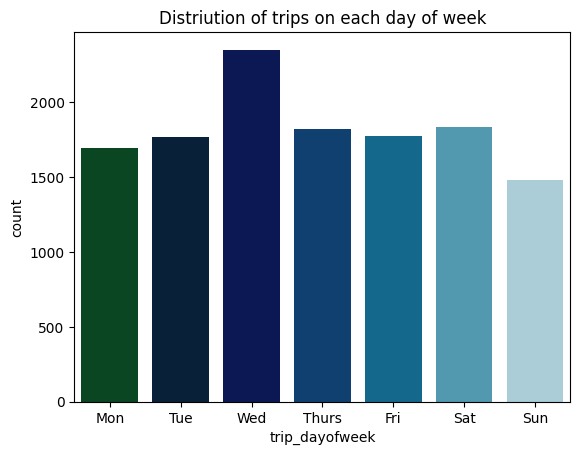

In [420]:
sns.countplot(x = "trip_dayofweek",data=trip,order=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'], palette = 'ocean')
plt.title("Distriution of trips on each day of week")
plt.show()

In [421]:
'''
So we see that maximum number of trips are happening on Wednesday and minimum on Sunday.
'''

'\nSo we see that maximum number of trips are happening on Wednesday and minimum on Sunday.\n'

###Distribution of Actual and Calculated(OSRM) Time Taken for Trips

<ipython-input-422-37a2a6c52f92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
<ipython-input-422-37a2a6c52f92>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_time"], hist=False, label = "OSRM Time")


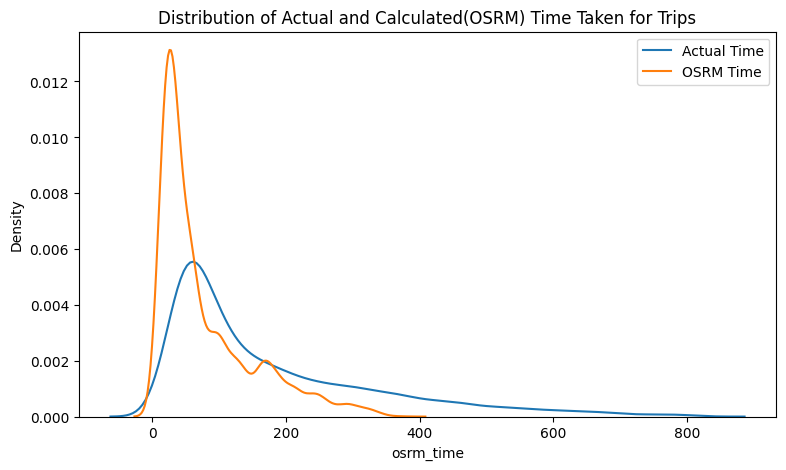

In [422]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
sns.distplot(trip["osrm_time"], hist=False, label = "OSRM Time")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Time Taken for Trips")
plt.show()

In [423]:
'''
So we see that actual time distribution has a kind of skewed distribution. Also, OSRM seems to
be calculating time taken as less than what time it actually takes. This might be because in actual
scenario, there might be delays caused by unprecedented traffic or other delays.
'''

'\nSo we see that actual time distribution has a kind of skewed distribution. Also, OSRM seems to\nbe calculating time taken as less than what time it actually takes. This might be because in actual\nscenario, there might be delays caused by unprecedented traffic or other delays.\n'

###Distribution of Actual and Calculated(OSRM) Distance of Trips

<ipython-input-424-64e3c9b3f91b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_distance_to_destination"], hist=False, label = "Actual Distance")
<ipython-input-424-64e3c9b3f91b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_distance"], hist=False, 

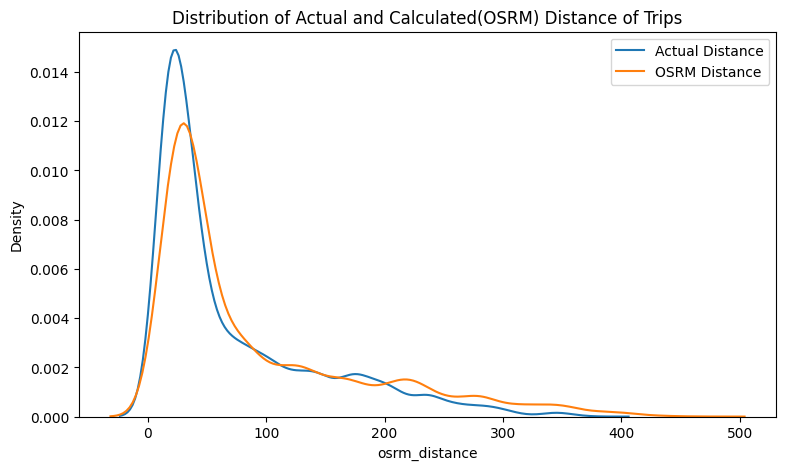

In [424]:
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_distance_to_destination"], hist=False, label = "Actual Distance")
sns.distplot(trip["osrm_distance"], hist=False, label = "OSRM Distance")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Distance of Trips")
plt.show()


In [425]:
'''
As we can see, the distributions are similar, however, OSRM distance has greater spread than actual
(which means distance covered actually is on the lower side as compared to OSRM calculated).
'''

'\nAs we can see, the distributions are similar, however, OSRM distance has greater spread than actual\n(which means distance covered actually is on the lower side as compared to OSRM calculated).\n'

###Start Scan to End Scan vs Differnce between Trip Start and End

<ipython-input-426-5bf679990b4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["start_scan_to_end_scan"], label = "Time taken to deliver from Source to Destination")
<ipython-input-426-5bf679990b4d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["od_time_diff_hour"], label = "Diff

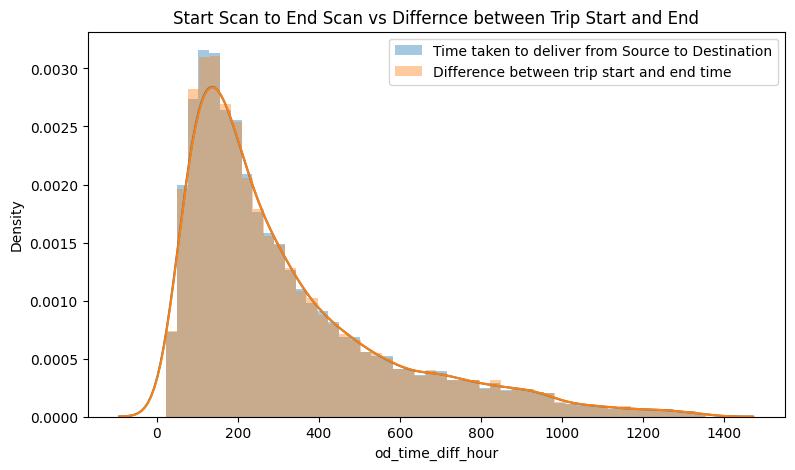

In [426]:
plt.figure(figsize=(9,5))
sns.distplot(trip["start_scan_to_end_scan"], label = "Time taken to deliver from Source to Destination")
sns.distplot(trip["od_time_diff_hour"], label = "Difference between trip start and end time")
plt.legend()
plt.title("Start Scan to End Scan vs Differnce between Trip Start and End")
plt.show()

In [427]:
'''
There is not much difference between the above two variables.
'''

'\nThere is not much difference between the above two variables.\n'

##Bivariate Analysis


In [428]:
trip.head(1)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,route_type_Carting,route_type_FTL
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,73.186911,143.0,68.0,85.111,141.0,65.0,84.1894,181.611874,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,Wed,1.0,0.0


###Does the distribution of time taken depend on the route type (carting vs full truck load) ?

<ipython-input-429-1e793e207ecc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_FTL"]==1]["actual_time"], label = "FTL", ax = ax[0])
<ipython-input-429-1e793e207ecc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_Carting"]==1]["actual_time"], label

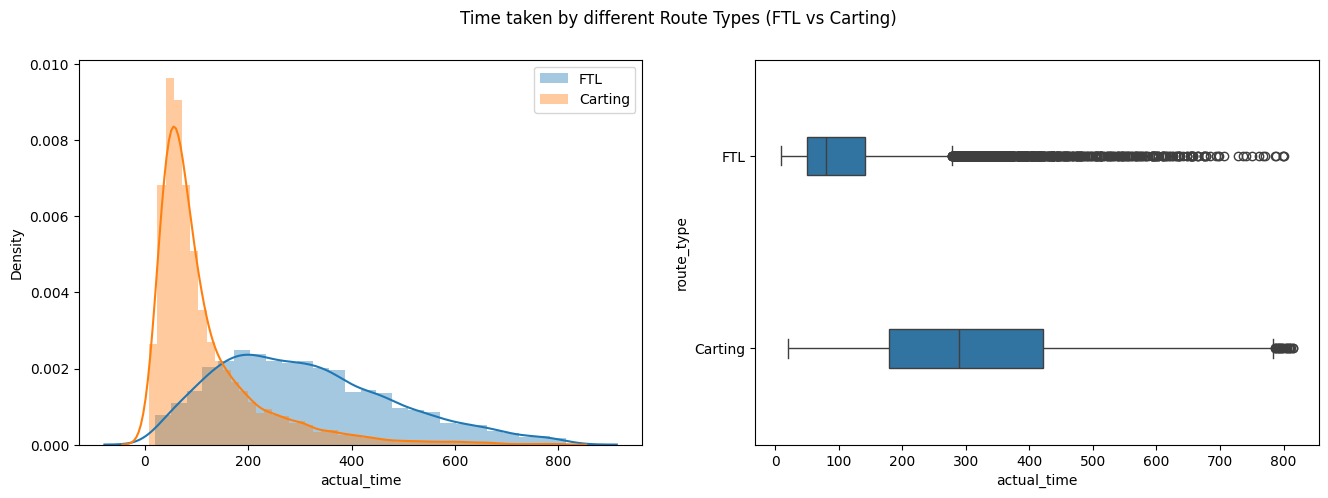

In [429]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(trip[trip["route_type_FTL"]==1]["actual_time"], label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type_Carting"]==1]["actual_time"], label = "Carting", ax = ax[0])

sns.boxplot(x = "actual_time", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])
plt.suptitle("Time taken by different Route Types (FTL vs Carting)")
plt.show()

In [430]:
'''
So we see that the time taken by full truck load deliveries is on average, a lot higher (>300 hours)
(probably because the distance covered by trucks is also much higher since they don’t make stops)
than the cart deliveries (<100 hours).
'''

'\nSo we see that the time taken by full truck load deliveries is on average, a lot higher (>300 hours)\n(probably because the distance covered by trucks is also much higher since they don’t make stops)\nthan the cart deliveries (<100 hours).\n'

###Does the distribution of distance covered depend on the route type (carting vs full truck load) ?

<ipython-input-431-77c7ae2397e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_FTL"]==1]["actual_distance_to_destination"], label = "FTL", ax = ax[0])
<ipython-input-431-77c7ae2397e8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_Carting"]==1]["a

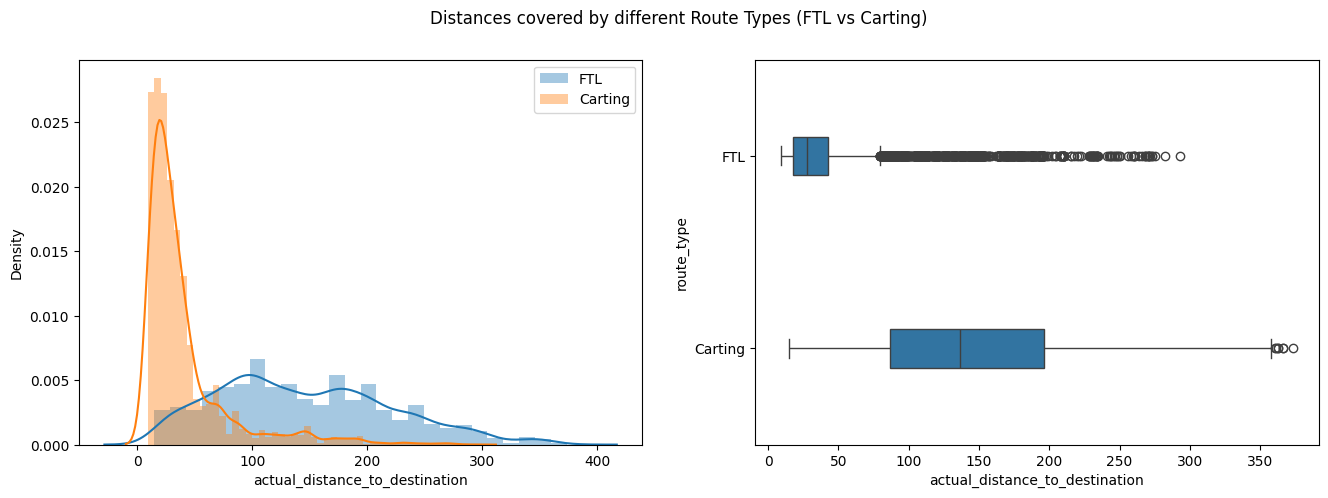

In [431]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(trip[trip["route_type_FTL"]==1]["actual_distance_to_destination"], label = "FTL", ax = ax[0])
sns.distplot(trip[trip["route_type_Carting"]==1]["actual_distance_to_destination"], label = "Carting", ax = ax[0])

sns.boxplot(x = "actual_distance_to_destination", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])

ax[0].legend()
ax[1].set_yticklabels(["FTL","Carting"])

plt.suptitle("Distances covered by different Route Types (FTL vs Carting)")
plt.show()


In [432]:
'''
So our initial assumption is correct. The full truck load deliveries cover much longer distances on
average (>150 kms) than carting deliveries (~ 25 kms).
'''

'\nSo our initial assumption is correct. The full truck load deliveries cover much longer distances on\naverage (>150 kms) than carting deliveries (~ 25 kms).\n'

###Distribution of time taken and distance covered by deliveries depending on the hour of the day


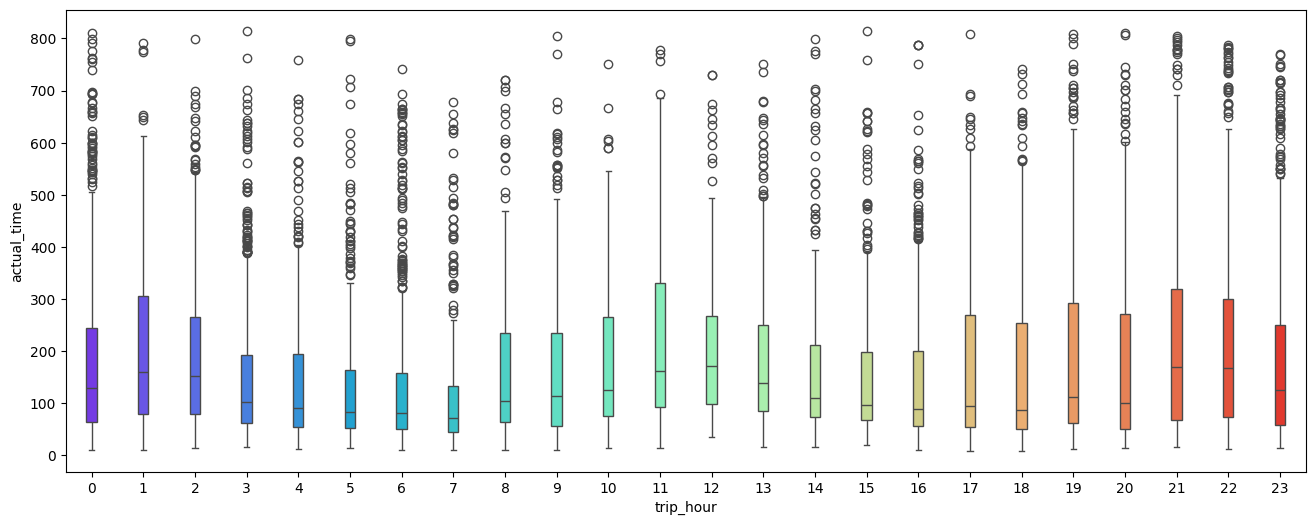

In [433]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_hour", y = "actual_time", data = trip, width=0.2, palette = 'rainbow')
plt.show()

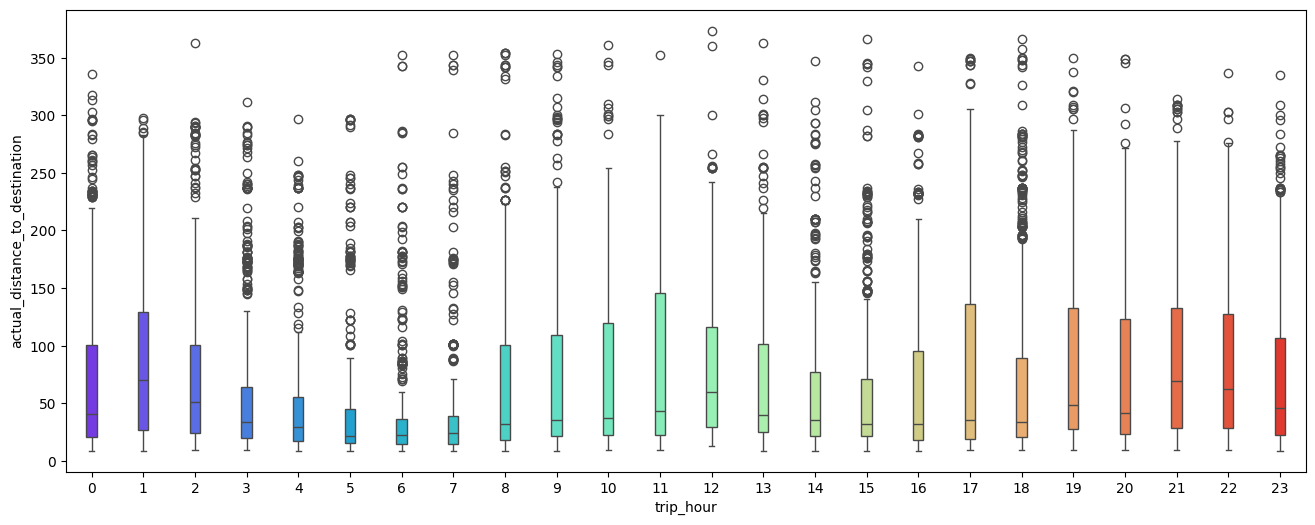

In [434]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_hour", y = "actual_distance_to_destination", data = trip, width=0.2, palette = 'rainbow')
plt.show()

In [435]:
'''
Time and distances follow similar trends against the hour of the day. Maximum time and distance
deliveries are likely to be made during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7
PM and 1 AM
'''

'\nTime and distances follow similar trends against the hour of the day. Maximum time and distance\ndeliveries are likely to be made during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7\nPM and 1 AM\n'

###Distribution of time taken and distance covered by deliveries depending on the day of the week

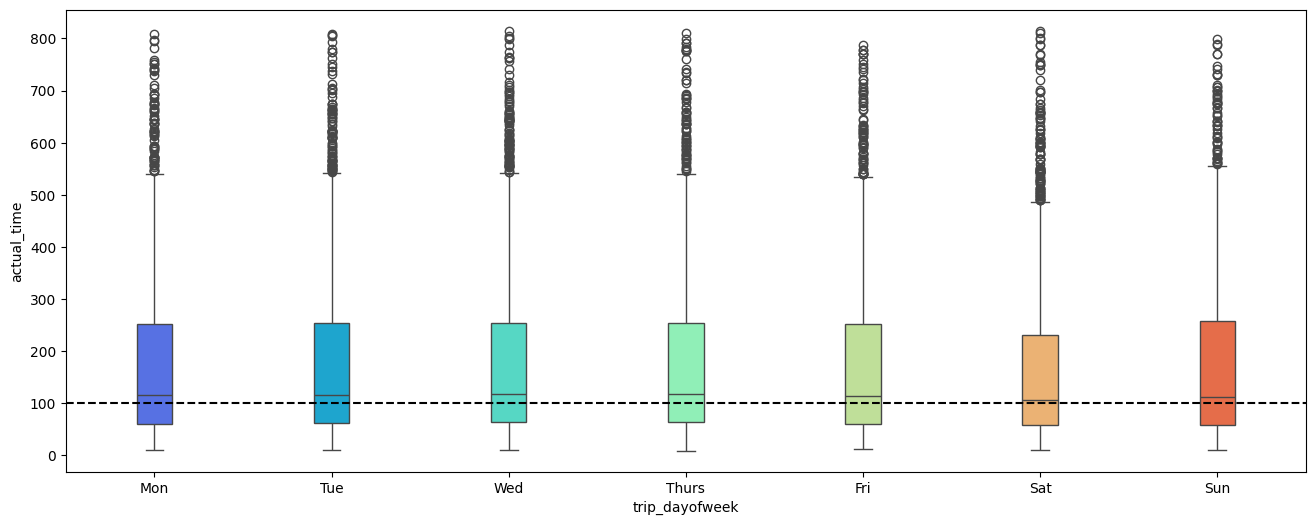

In [436]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_dayofweek", y = "actual_time", data = trip, width=0.2, order = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'], palette = 'rainbow')

plt.axhline(y=100, color='k', ls = '--')
plt.show()


In [437]:
'''
On average, time taken is slightly more on weekdays and Sunday as compared to Saturday. However,
they are very similar.
'''

'\nOn average, time taken is slightly more on weekdays and Sunday as compared to Saturday. However,\nthey are very similar.\n'

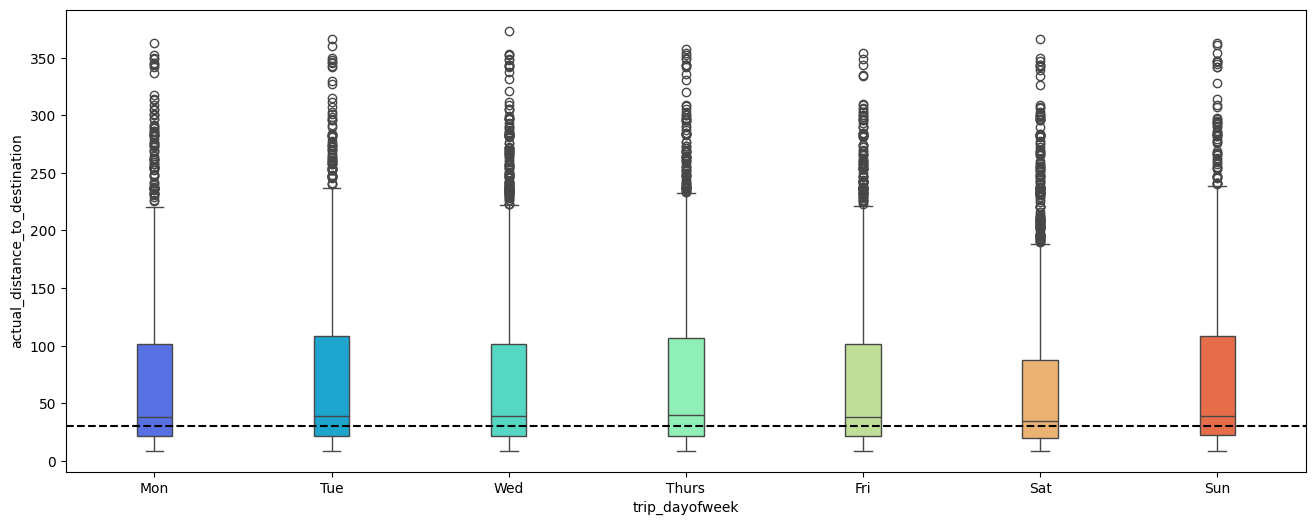

In [438]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "trip_dayofweek", y = "actual_distance_to_destination", data = trip, width=0.2, order = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'], palette = 'rainbow')
plt.axhline(y=30, color='k', ls = '--')
plt.show()

In [439]:
'''
Distance covered is also lowest on Saturday
'''

'\nDistance covered is also lowest on Saturday\n'

###Route Type Distributions for Top 3 States

####Destination States

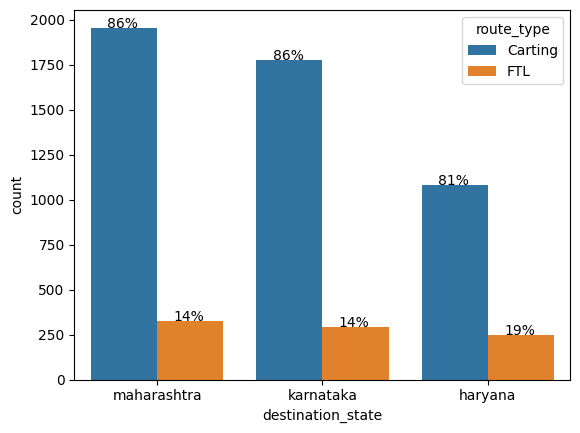

In [440]:
top3d = trip[(trip["destination_state"]=='maharashtra')|(trip["destination_state"]=='karnataka')|(trip["destination_state"]=='haryana')]

top3d = top3d[['route_type','destination_state']]


#top3d['route_type'] = top3d['route_type'].map({0:'FTL',1:'Carting'})

st = ['maharashtra','karnataka','haryana']

g = sns.countplot(x='destination_state',hue='route_type', data=top3d, order = st)

percx = []

for e in st:
  percx.append(top3d[(top3d['destination_state']==e)&(top3d["route_type"]=="Carting")].shape[0]/top3d[top3d['destination_state']==e].shape[0])

for e in st:
  percx.append(top3d[(top3d['destination_state']==e)&(top3d["route_type"]=="FTL")].shape[0]/top3d[top3d['destination_state']==e].shape[0])

i=0
for p in g.patches:
  if i < len(percx):
    txt = str((round(percx[i]*100))) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x+0.1,txt_y,txt)
    i+=1

plt.show()


In [441]:
'''
So we see that for top 3 destination states, Maharashtra hs 86% Carting and 14% FTL, Karnataka
has 86% Carting and 14% FTL, Haryana has 81% Carting and 19% FTL.
'''

'\nSo we see that for top 3 destination states, Maharashtra hs 86% Carting and 14% FTL, Karnataka\nhas 86% Carting and 14% FTL, Haryana has 81% Carting and 19% FTL.\n'

####Source States

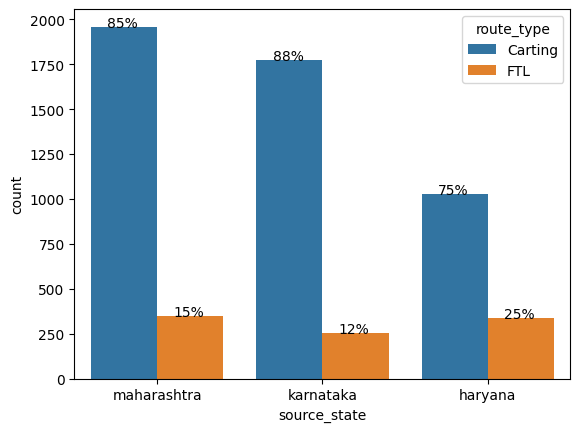

In [442]:
top3d = trip[(trip["source_state"]=='maharashtra')|(trip["source_state"]=='karnataka')|(trip["source_state"]=='haryana')]

top3d = top3d[['route_type','source_state']]


#top3d['route_type'] = top3d['route_type'].map({0:'FTL',1:'Carting'})

st = ['maharashtra','karnataka','haryana']

g = sns.countplot(x='source_state',hue='route_type', data=top3d, order = st)

percx = []

for e in st:
  percx.append(top3d[(top3d['source_state']==e)&(top3d["route_type"]=="Carting")].shape[0]/top3d[top3d['source_state']==e].shape[0])

for e in st:
  percx.append(top3d[(top3d['source_state']==e)&(top3d["route_type"]=="FTL")].shape[0]/top3d[top3d['source_state']==e].shape[0])

i=0
for p in g.patches:
  if i < len(percx):
    txt = str((round(percx[i]*100))) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x+0.1,txt_y,txt)
    i+=1

plt.show()


In [443]:
'''
So we see that for top 3 source states, Maharashtra hs 85% Carting and 15% FTL, Karnataka has
88% Carting and 12% FTL, Haryana has 75% Carting and 25% FTL.
'''

'\nSo we see that for top 3 source states, Maharashtra hs 85% Carting and 15% FTL, Karnataka has\n88% Carting and 12% FTL, Haryana has 75% Carting and 25% FTL.\n'

##Hypothesis Testing

### start_scan_to_end_scan v/s od_time_diff_hour

In [444]:
'''

H0 : The means of both the groups are equal.
H1: The means are not equal.
α = 0.05

'''

'\n\nH0 : The means of both the groups are equal.\nH1: The means are not equal.\nα = 0.05\n\n'

<ipython-input-445-aa989f9ecf5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["start_scan_to_end_scan"], label="start_scan_to_end_scan")
<ipython-input-445-aa989f9ecf5c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["od_time_diff_hour"], label="od_time_diff_hour")


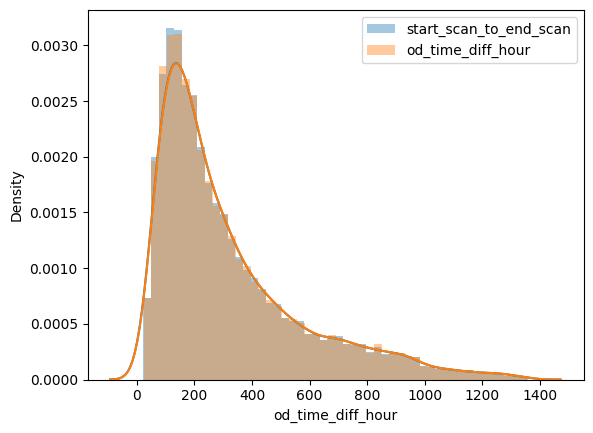

In [445]:
sns.distplot(trip["start_scan_to_end_scan"], label="start_scan_to_end_scan")
sns.distplot(trip["od_time_diff_hour"], label="od_time_diff_hour")
plt.legend()
plt.show()

In [446]:
'''
From the above plot, the means indeed appear to be the same. We will perform 2-sample t-test to
find out. But first we shall convert our data to a normal distribution using boxcox transformation
'''

'\nFrom the above plot, the means indeed appear to be the same. We will perform 2-sample t-test to\nfind out. But first we shall convert our data to a normal distribution using boxcox transformation\n'

<ipython-input-447-8bba7d866cff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trf1)
<ipython-input-447-8bba7d866cff>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trf2)


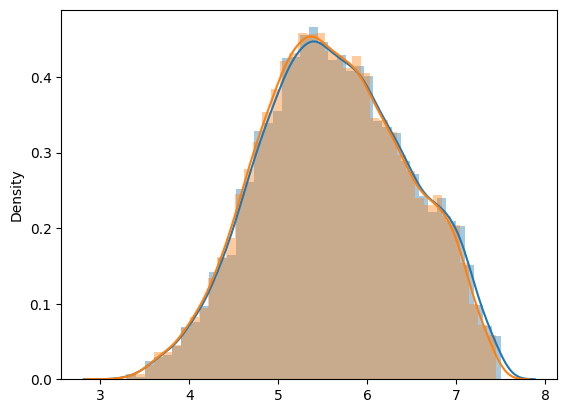

In [447]:
from scipy.stats import boxcox
x_trf1 , lambda1 = boxcox(trip["start_scan_to_end_scan"])
x_trf2 , lambda2 = boxcox(trip["od_time_diff_hour"])
sns.distplot(x_trf1)
sns.distplot(x_trf2)
plt.show()

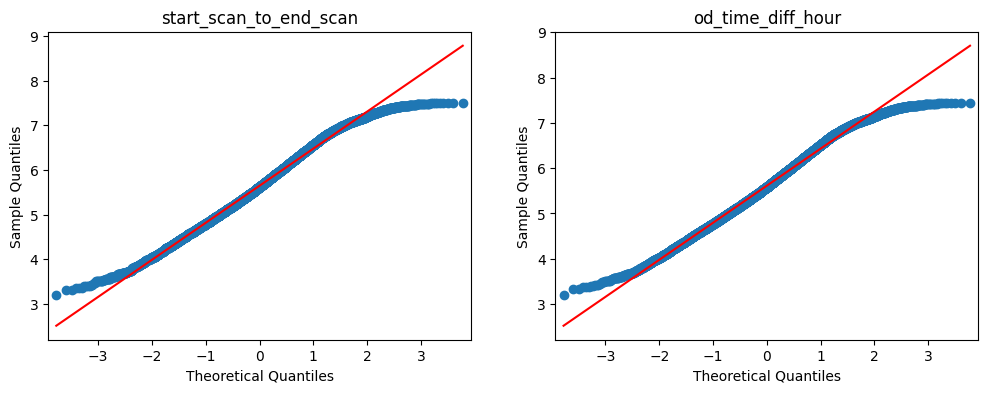

In [448]:
import statsmodels.api as sms

fig, ax = plt.subplots(1,2,figsize=(12,4))

sms.qqplot(x_trf1, line='s', ax = ax[0])
sms.qqplot(x_trf2, line='s', label='od_time_diff_hour', ax = ax[1])

ax[0].set_title('start_scan_to_end_scan')
ax[1].set_title('od_time_diff_hour')

plt.show()

In [449]:
'''
Since our data is not normal even after trying BoxCox transform, we perform a non-parametric
test (Mann-Whitney). Now our H0 and H1 become :

H0 : The median of both groups are equal.
H1: The median are not equal.
'''

'\nSince our data is not normal even after trying BoxCox transform, we perform a non-parametric\ntest (Mann-Whitney). Now our H0 and H1 become :\n\nH0 : The median of both groups are equal.\nH1: The median are not equal.\n'

In [450]:
from scipy.stats import mannwhitneyu

test_stat, p_val = mannwhitneyu(trip["start_scan_to_end_scan"].sample(1000), trip["od_time_diff_hour"].sample(1000))
test_stat, p_val

(505912.0, 0.6471042714854605)

In [451]:
'''
Since p > α (0.05), we fail to reject the null hypothesis.
Hence, the sample distributions seem to be the same for ‘start_scan_to_end_scan’ and ‘od_time_diff_hour’.
So, the trip duration and the difference between trip start and end are indeed the same.
'''

'\nSince p > α (0.05), we fail to reject the null hypothesis. \nHence, the sample distributions seem to be the same for ‘start_scan_to_end_scan’ and ‘od_time_diff_hour’. \nSo, the trip duration and the difference between trip start and end are indeed the same.\n'

###actual_time v/s osrm_time

In [452]:
'''
H0 : The means of actual_time and calculated(osrm) time are equal.
H1: The means are not equal.
α = 0.05
'''

'\nH0 : The means of actual_time and calculated(osrm) time are equal.\nH1: The means are not equal.\nα = 0.05\n'

<ipython-input-453-42bf59f3709e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_time"], label="actual")
<ipython-input-453-42bf59f3709e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_time"], label="osrm")


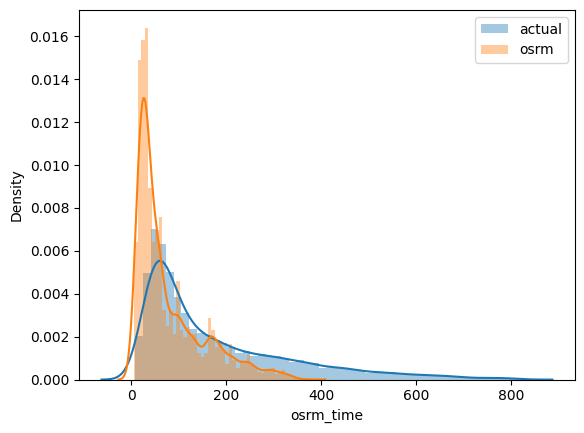

In [453]:
sns.distplot(trip["actual_time"], label="actual")
sns.distplot(trip["osrm_time"], label="osrm")
plt.legend()
plt.show()

In [454]:
'''
From the plot above, it is clear that these do not follow normal distribution. So we go for the
non-parametric Mann-Whitney test. Now our H0 and H1 become :

H0 : The median of both groups are equal.
H1: The median are not equal.
'''

'\nFrom the plot above, it is clear that these do not follow normal distribution. So we go for the\nnon-parametric Mann-Whitney test. Now our H0 and H1 become :\n\nH0 : The median of both groups are equal.\nH1: The median are not equal.\n'

In [455]:
test_stat, p_val = mannwhitneyu(trip["actual_time"].sample(1000), trip["osrm_time"].sample(1000))
test_stat, p_val

(734070.5, 1.9543151365791207e-73)

In [456]:
'''
Since p < α (0.05), we reject the null hypothesis.
Hence, the sample distributions are different.
So,
the actual time and the time calculated by algorithm (osrm) are very different.
'''

'\nSince p < α (0.05), we reject the null hypothesis. \nHence, the sample distributions are different.\nSo,\nthe actual time and the time calculated by algorithm (osrm) are very different.\n'

###actual_time v/s segment_actual_time

In [457]:
'''
H0 : The mean of actual_time and segment_actual_time are equal.
H1: The mean are not equal.
α = 0.05
'''

'\nH0 : The mean of actual_time and segment_actual_time are equal.\nH1: The mean are not equal.\nα = 0.05\n'

<ipython-input-458-12e5f837a4c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["actual_time"], label="actual")
<ipython-input-458-12e5f837a4c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["segment_actual_time_sum"], label="actual_segment_sum")


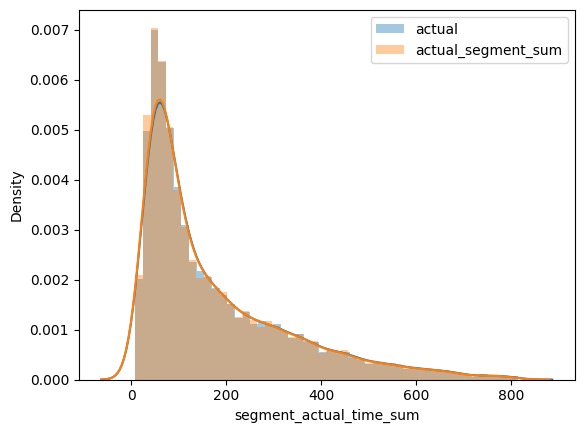

In [458]:
sns.distplot(trip["actual_time"], label="actual")
sns.distplot(trip["segment_actual_time_sum"], label="actual_segment_sum")
plt.legend()
plt.show()

In [459]:
'''
Once again, we see that the times are not normally distributed. However, the distributions look
similar. We use the non parametric Mann-Whitney test again. Now our H0 and H1 become :
H0 : The median of both groups are equal.
H1: The median are not equal.
'''

'\nOnce again, we see that the times are not normally distributed. However, the distributions look\nsimilar. We use the non parametric Mann-Whitney test again. Now our H0 and H1 become :\nH0 : The median of both groups are equal.\nH1: The median are not equal.\n'

In [460]:
test_stat, p_val = mannwhitneyu(trip["actual_time"].sample(1000), trip["segment_actual_time_sum"].sample(1000))
test_stat, p_val

(499727.0, 0.9831637175913547)

In [461]:
'''
Since p > α (0.05), we fail to reject the null hypothesis.
Hence, the sample distributions seem to be the same for ‘segment_actual_time’ and ‘actual_time’.
So, the actual total time taken for a
trip is similar to the sum of the distances of a trip’s segments.
'''

'\nSince p > α (0.05), we fail to reject the null hypothesis. \nHence, the sample distributions seem to be the same for ‘segment_actual_time’ and ‘actual_time’. \nSo, the actual total time taken for a\ntrip is similar to the sum of the distances of a trip’s segments.\n'

###osrm_distance v/s segment_osrm_distance_sum

In [462]:
'''
H0 : The mean of osrm_distance and segment_osrm_distance_sum are equal.
H1: The mean are not equal.

α = 0.05
'''

'\nH0 : The mean of osrm_distance and segment_osrm_distance_sum are equal.\nH1: The mean are not equal.\n\nα = 0.05\n'

<ipython-input-463-1559da67a5a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_distance"], hist=False, label="osrm_distance")
<ipython-input-463-1559da67a5a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["segment_osrm_distance_sum"], hist=False, label="os

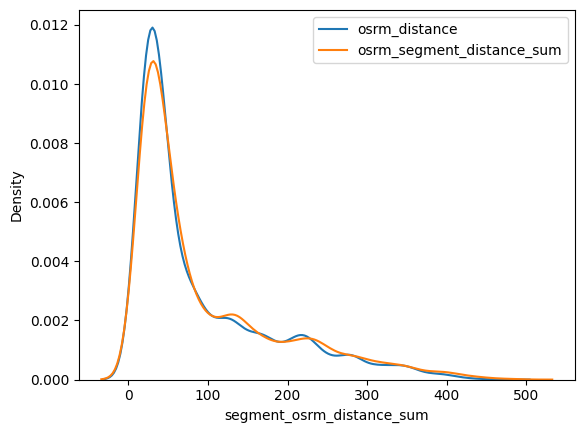

In [463]:
sns.distplot(trip["osrm_distance"], hist=False, label="osrm_distance")
sns.distplot(trip["segment_osrm_distance_sum"], hist=False, label="osrm_segment_distance_sum")
plt.legend()
plt.show()

In [464]:
'''
Once again, these distributions look slightly different. Also, they are not normal.
We use the non-paramteric Mann-Whitney test.

Now our H0 and H1 become :
H0 : The median of both groups are equal.
H1: The median are not equal.

'''

'\nOnce again, these distributions look slightly different. Also, they are not normal. \nWe use the non-paramteric Mann-Whitney test. \n\nNow our H0 and H1 become :\nH0 : The median of both groups are equal.\nH1: The median are not equal.\n\n'

In [465]:
test_stat, p_val = mannwhitneyu(trip["osrm_distance"].sample(1000), trip["segment_osrm_distance_sum"].sample(1000))
test_stat, p_val

(467816.5, 0.01269325488736186)

In [466]:
'''
Since p > alpha (0.05), we fail to reject the null hypothesis.
Hence, the sample distributions are same.
So,
the overall distance calculated by osrm
and the sum of individual segment distances calculated by osrm are same.
'''

'\nSince p > alpha (0.05), we fail to reject the null hypothesis. \nHence, the sample distributions are same. \nSo,\nthe overall distance calculated by osrm \nand the sum of individual segment distances calculated by osrm are same.\n'

###osrm_time v/s segment_osrm_time_sum

In [467]:
'''
H0 : The mean of osrm_time and segment_osrm_time_sum are equal.
H1: The mean are not equal.
α = 0.05
'''

'\nH0 : The mean of osrm_time and segment_osrm_time_sum are equal.\nH1: The mean are not equal.\nα = 0.05\n'

<ipython-input-468-662044244280>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["osrm_time"], hist=False, label="osrm_time")
<ipython-input-468-662044244280>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip["segment_osrm_time_sum"], hist=False,label="osrm_segment_ti

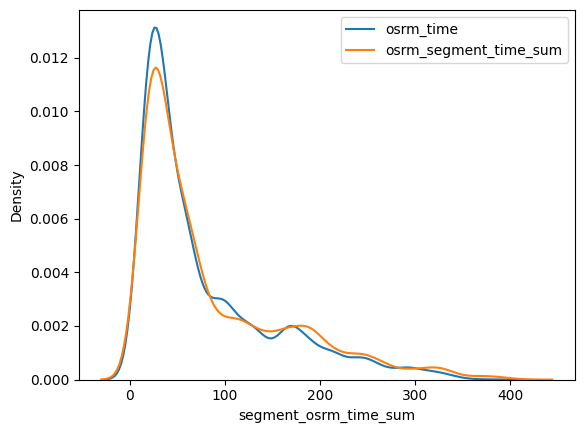

In [468]:
sns.distplot(trip["osrm_time"], hist=False, label="osrm_time")
sns.distplot(trip["segment_osrm_time_sum"], hist=False,label="osrm_segment_time_sum")
plt.legend()
plt.show()

In [469]:
'''
The distributions look slightly different and are not normal. We use non parametric Mann-Whitney
test. Now our H0 and H1 become :
H0 : The median of both groups are equal.
H1: The median are not equal.
'''

'\nThe distributions look slightly different and are not normal. We use non parametric Mann-Whitney\ntest. Now our H0 and H1 become :\nH0 : The median of both groups are equal.\nH1: The median are not equal.\n'

In [492]:
test_stat, p_val = mannwhitneyu(trip["osrm_time"].sample(1000), trip["segment_osrm_time_sum"].sample(1000))
test_stat, p_val

(506140.0, 0.634464392554718)

In [471]:
'''
Since p > alpha (0.05), we fail to reject the null hypothesis.
Hence, the sample distributions are same.
So, the overall time calculated by osrm and the sum of individual segment time caluclated by osrm are
same.
'''

'\nSince p > alpha (0.05), we fail to reject the null hypothesis. \nHence, the sample distributions are same. \nSo, the overall time calculated by osrm and the sum of individual segment time caluclated by osrm are\nsame.\n'

###actual_distance_to_destination for FTL vs Carting

In [472]:
'''
H0: The median distance of FTL and Carting is same.
H1: The median are different.
'''

'\nH0: The median distance of FTL and Carting is same.\nH1: The median are different.\n'

<ipython-input-473-deae156fed06>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_FTL"]==1]["actual_distance_to_destination"], hist=False, label="FTL")
<ipython-input-473-deae156fed06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["route_type_

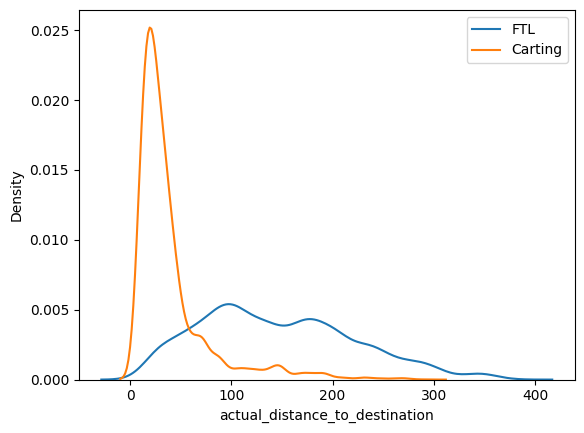

In [473]:
sns.distplot(trip[trip["route_type_FTL"]==1]["actual_distance_to_destination"], hist=False, label="FTL")
sns.distplot(trip[trip["route_type_Carting"]==1]["actual_distance_to_destination"], hist=False, label="Carting")
plt.legend()
plt.show()

In [474]:
'''
The ditributions are clearly different and not normal. So we use non paramteric Mann-Whitney
test.
'''

'\nThe ditributions are clearly different and not normal. So we use non paramteric Mann-Whitney\ntest.\n'

In [475]:
test_stat, p_val = mannwhitneyu(trip[trip["route_type_FTL"]==1]["actual_distance_to_destination"].sample(1000), trip[trip["route_type_Carting"]==1]["actual_distance_to_destination"].sample(1000))
test_stat, p_val

(913892.0, 2.0664600733440896e-225)

In [476]:
'''
Since p < ff (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So,
the actual distances covered for FTL routes is different from that of Carting routes.
'''

'\nSince p < ff (0.05), we reject the null hypothesis. Hence, the sample distributions are different. So,\nthe actual distances covered for FTL routes is different from that of Carting routes.\n'

###Does time taken depend on day of week?

In [477]:
'''
H0: The median time taken of all week days are same.
H1: The median are different.
'''

'\nH0: The median time taken of all week days are same.\nH1: The median are different.\n'

<ipython-input-478-1fb61385b998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["trip_dayofweek"]==day]["actual_time"], hist=False,label=day)
<ipython-input-478-1fb61385b998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trip[trip["trip_dayofweek"]==day]["actual_

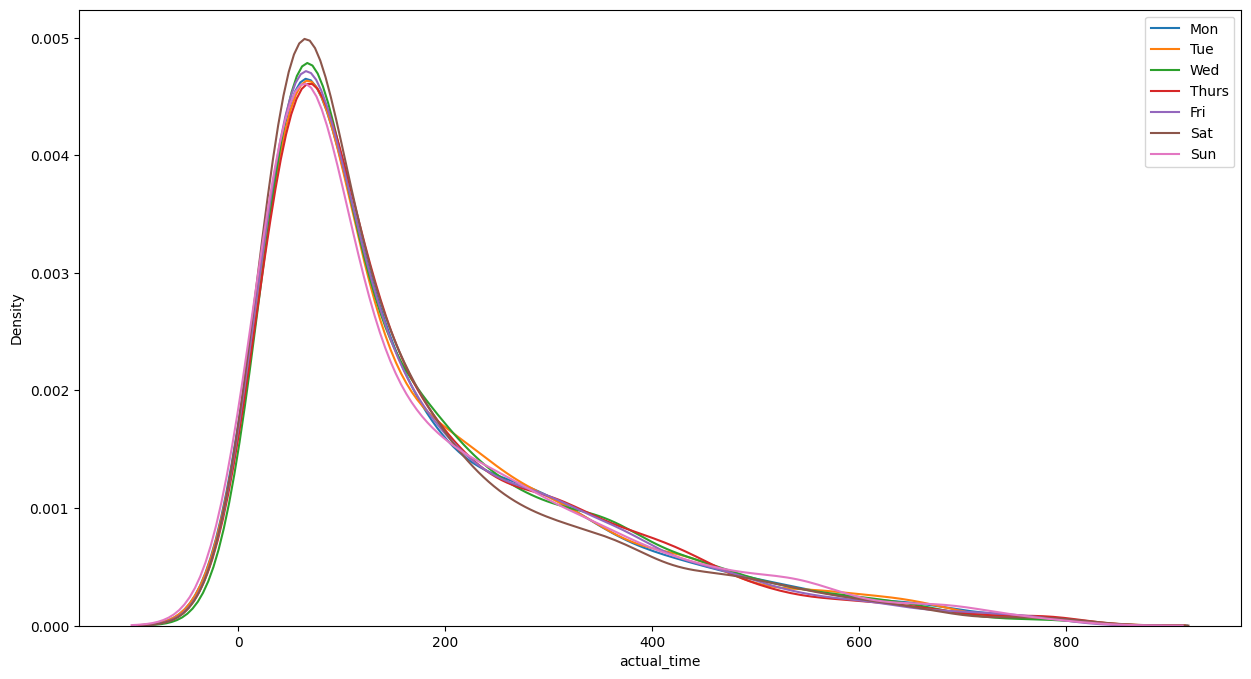

In [478]:
plt.figure(figsize=(15,8))

days = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']

daydist=[]

for day in days:
  daydist.append(trip[trip["trip_dayofweek"]==day]["actual_time"])
  sns.distplot(trip[trip["trip_dayofweek"]==day]["actual_time"], hist=False,label=day)

plt.legend()
plt.show()


In [479]:
'''
The distributions look slightly different. We will perform the non-parametric counterpart to one
way ANOVA, the Kruskal Willis Test (and hence the medians in our hypothesis).
'''

'\nThe distributions look slightly different. We will perform the non-parametric counterpart to one\nway ANOVA, the Kruskal Willis Test (and hence the medians in our hypothesis).\n'

In [480]:
from scipy import stats

stats.kruskal(daydist[0],daydist[1],daydist[2],daydist[3],daydist[4],daydist[5],daydist[6])

KruskalResult(statistic=8.743242607332519, pvalue=0.18854113288304772)

In [481]:
'''
Since p > ff (0.05), we fail to reject the null hypothesis. Hence, the sample distributions of time
taken seem to be the same for all week days.
'''

'\nSince p > ff (0.05), we fail to reject the null hypothesis. Hence, the sample distributions of time\ntaken seem to be the same for all week days.\n'

#Normalize/Standardize the numerical features using MinMax Scaler/ Standard Scaler

In [482]:
numerical_columns = [
'start_scan_to_end_scan',
'od_time_diff_hour',
'actual_distance_to_destination',
'actual_time',
'osrm_time',
'osrm_distance',
'segment_actual_time_sum',
'segment_osrm_time_sum',
'segment_osrm_distance_sum']

In [483]:
scaler = StandardScaler()

trip[numerical_columns] = scaler.fit_transform(trip[numerical_columns])

trip[numerical_columns]

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.262662,-0.145358
1,-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.878225,-0.823653
2,1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.365464,0.514899
3,-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.790288,-0.737295
4,-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.915913,-0.906532
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.246189,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.300349,-0.349273
12719,-1.018130,-1.017809,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.941038,-0.863608
12720,0.394533,0.395103,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.026276,0.072932
12721,0.104957,0.107436,0.865940,0.547267,1.390274,0.886261,0.523279,1.697092,1.324267


In [484]:
trip[numerical_columns].describe()

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,7.818595e-18,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,6.031487e-17,-8.488760e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-1.162915e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-1.003850e+00,-9.375981e-01
25%,-7.207269e-01,-7.210516e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.274750e-01,-7.228116e-01
50%,-3.411472e-01,-3.418602e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.134119e-01,-4.628077e-01
75%,4.023595e-01,4.020802e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.910897e-01,4.488499e-01
max,4.049455e+00,4.050310e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.046283e+00,4.130135e+00


# Business Insights

In [485]:
'''

1. Most trips use “Carting” (~8K) transportation type as opposed to “FTL” (~4K).

2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities.
Bhiwandi, Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors.
So, we see that the Southern, Western and Northern corridors have the top contributing cities.

3. The top contributor states (both source and destination) are : Maharashtra is the highest,
followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal.
Again we see Western, Southern and Northern corridors have significant contribution to the traffic.

4. The greatest amount of time was spent in intra-state trips within Maharashtra, Karnataka,
Tamil Nadu, Telengana, UP.

5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,
Tamil Nadu, Telengana and Andhra.

6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai, Hyderabad.
A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and
Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.

7. Hourly distribution of number of trips in a day : minimum trips occuring during the day
hours (8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).

8. Week Day : we see that maximum number of trips are happening on Wednesday and minimum on Sunday.

9. OSRM seems to be calculating time taken as less than what time it actually takes.
This might be because in actual scenario, there might be delays caused by unprecedented traffic
or other delays.

10. OSRM seems to be calculating distance as less than what distance is actually covered.
So, OSRM is underestimating time and overestimting the distance.

11. The time taken by full truck load deliveries is on average, a lot higher (>300 hours) (this is
because the distance covered by trucks is also mucvh higher since they don’t make stops) than
the cart deliveries (<100 hours).
The full truck load deliveries cover much longer distances
on average (>150 kms) than carting deliveries (~ 25 kms).

12. Hourly distribution of trip time and distances : Time and distances follow similar trends
against the hour of the day. Maximum time and distance deliveries are likely to be made
during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7 PM and 1 AM.

13. Weekday distribution of trip time and distances : On average, time taken is slightly more on
weekdays and Sunday as compared to Saturday. However, they are very similar.
Distance covered is also lowest on Saturday.

14. Route type of top 3 Destination states :
Maharashtra has 86% Carting and 14% FTL,
Karnataka has 86% Carting and 14% FTL,
Haryana has 81% Carting and 19% FTL.

15. Route type of top 3 Source states :
Maharashtra hs 85% Carting and 15% FTL,
Karnataka has 88% Carting and 12% FTL,
Haryana has 75% Carting and 25% FTL.

'''

'\n\n1. Most trips use “Carting” (~8K) transportation type as opposed to “FTL” (~4K).\n\n2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities.\nBhiwandi, Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. \nSo, we see that the Southern, Western and Northern corridors have the top contributing cities.\n\n3. The top contributor states (both source and destination) are : Maharashtra is the highest,\nfollowed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. \nAgain we see Western, Southern and Northern corridors have significant contribution to the traffic.\n\n4. The greatest amount of time was spent in intra-state trips within Maharashtra, Karnataka, \nTamil Nadu, Telengana, UP.\n\n5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,\nTamil Nadu, Telengana and Andhra.\n\n6. Similarly, the greatest amount of time was spent in intra-city trips within B

# Recommendations

In [486]:
'''

1. Since there is significant dfference between the time and distances calculated by OSRM with
actual time and distances, it might make sense to revisit the information which is fed to the
routing engine for trip planning. We need to check for discrrepancies with transporters nd to
check if the routing engine is configured for optimum performance.

2. We have seen that the Western, Southern and Northern corridors have significant traffic,
however, not so much in Eastern, Central and North Eastern corridors.
Increasing the presence in these corridors is worth investigating.

3. There is a need to plan resources (specifically during regional festivities) in the states/cities
which have highest contribution to traffic.

4. Road network can be taken into consideration to increase the number of FTL deliveries inter
state and to connect the states where there is lower traffic.

5. Since intra state or intra city trips are more likely to be using “carting” as mehod of transport,
the number of hubs could be increased in those cities and states which have highest contribution to traffic.

'''

'\n\n1. Since there is significant dfference between the time and distances calculated by OSRM with\nactual time and distances, it might make sense to revisit the information which is fed to the\nrouting engine for trip planning. We need to check for discrrepancies with transporters nd to\ncheck if the routing engine is configured for optimum performance.\n\n2. We have seen that the Western, Southern and Northern corridors have significant traffic, \nhowever, not so much in Eastern, Central and North Eastern corridors. \nIncreasing the presence in these corridors is worth investigating.\n\n3. There is a need to plan resources (specifically during regional festivities) in the states/cities\nwhich have highest contribution to traffic.\n\n4. Road network can be taken into consideration to increase the number of FTL deliveries inter\nstate and to connect the states where there is lower traffic.\n\n5. Since intra state or intra city trips are more likely to be using “carting” as mehod of tr